# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [523]:
import warnings
warnings.filterwarnings("ignore")

In [524]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [525]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.10.3
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [526]:
# Try loading one file

df = pd.read_parquet('/Users/vidyabhushan/Documents/UpGrad/EDA/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [527]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [528]:
# from google.colab import drive
# drive.mount('/content/drive')

In [529]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
from datetime import datetime
# Select the folder having data files
os.chdir('/Users/vidyabhushan/Documents/UpGrad/EDA/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()
#print(file_list)

# initialise an empty dataframe
result_df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        #print(file_path)

        # Reading the current file
        taxi_df = pd.read_parquet(file_path)
        taxi_df['pickup_time'] = taxi_df['tpep_pickup_datetime'].apply(lambda p: datetime.time(p))
        taxi_df['pickup_hour'] = taxi_df['tpep_pickup_datetime'].apply(lambda p: datetime.time(p).hour)
        taxi_df['pickup_date'] = taxi_df['tpep_pickup_datetime'].apply(lambda p: datetime.date(p))


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        for date in taxi_df['pickup_date'].unique():
            #print("Date {}".format(date))
            date_df = taxi_df[taxi_df['pickup_date'] == date]
            
            for hour in date_df['pickup_hour'].unique():
                #print("Time {}".format(hour))
                hour_data = date_df[date_df['pickup_hour'] == hour]
                sample = hour_data.sample(frac=0.05, random_state = 42)
                sampled_data = pd.concat([sampled_data, sample])
                
        result_df = pd.concat([result_df, sampled_data])# we initialised this empty DF earlier
        #sampled_data.head()

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
result_df = result_df.reset_index()
        

Error reading file sampled_data.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


In [530]:
result_df.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0     1788         2  2023-12-01 00:27:51   2023-12-01 00:50:12   
1  3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55   
2     1408         2  2023-12-01 00:06:19   2023-12-01 00:16:57   
3  3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37   
4     3613         2  2023-12-01 00:16:07   2023-12-01 00:19:17   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           3.99         1.0                  N   
1              NaN           4.79         NaN               None   
2              1.0           1.05         1.0                  N   
3              NaN           2.08         NaN               None   
4              1.0           0.40         1.0                  N   

   PULocationID  DOLocationID  ...  tip_amount  tolls_amount  \
0           148            50  ...        5.66           0.0   
1           231            61  ...        3.00           0.0   
2           161           161  ...        3.14           0.0   
3           137           144  ...        0.00           0.0   
4            68            68  ...        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.96                   2.5          0.0   
1                    1.0         29.43                   NaN          NaN   
2                    1.0         18.84                   2.5          0.0   
3                    1.0         21.22                   NaN          NaN   
4                    1.0         10.10                   2.5          0.0   

   pickup_time  pickup_hour  pickup_date  airport_fee  
0     00:27:51            0   2023-12-01          NaN  
1     00:38:48            0   2023-12-01          NaN  
2     00:06:19            0   2023-12-01          NaN  
3     00:00:50            0   2023-12-01          NaN  
4     00:16:07            0   2023-12-01          NaN  

[5 rows x 24 columns]

In [531]:
result_df['index'].unique()

array([   1788, 3196699,    1408, ..., 3201445, 3201605, 3201025])

In [532]:
result_df.shape

(1896400, 24)

In [533]:
result_df['pickup_date'].unique()

array([datetime.date(2023, 12, 1), datetime.date(2023, 11, 30),
       datetime.date(2023, 12, 2), datetime.date(2023, 12, 3),
       datetime.date(2023, 12, 4), datetime.date(2023, 12, 5),
       datetime.date(2023, 12, 6), datetime.date(2023, 12, 7),
       datetime.date(2023, 12, 8), datetime.date(2023, 12, 9),
       datetime.date(2023, 12, 10), datetime.date(2023, 12, 11),
       datetime.date(2023, 12, 12), datetime.date(2023, 12, 13),
       datetime.date(2023, 12, 14), datetime.date(2023, 12, 15),
       datetime.date(2023, 12, 16), datetime.date(2023, 12, 17),
       datetime.date(2023, 12, 18), datetime.date(2023, 12, 19),
       datetime.date(2023, 12, 20), datetime.date(2023, 12, 21),
       datetime.date(2023, 12, 22), datetime.date(2023, 12, 23),
       datetime.date(2023, 12, 26), datetime.date(2023, 12, 27),
       datetime.date(2023, 12, 24), datetime.date(2023, 12, 25),
       datetime.date(2023, 12, 28), datetime.date(2023, 12, 29),
       datetime.date(2023, 12, 30)

In [534]:
result_df.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0     1788         2  2023-12-01 00:27:51   2023-12-01 00:50:12   
1  3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55   
2     1408         2  2023-12-01 00:06:19   2023-12-01 00:16:57   
3  3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37   
4     3613         2  2023-12-01 00:16:07   2023-12-01 00:19:17   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           3.99         1.0                  N   
1              NaN           4.79         NaN               None   
2              1.0           1.05         1.0                  N   
3              NaN           2.08         NaN               None   
4              1.0           0.40         1.0                  N   

   PULocationID  DOLocationID  ...  tip_amount  tolls_amount  \
0           148            50  ...        5.66           0.0   
1           231            61  ...        3.00           0.0   
2           161           161  ...        3.14           0.0   
3           137           144  ...        0.00           0.0   
4            68            68  ...        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.96                   2.5          0.0   
1                    1.0         29.43                   NaN          NaN   
2                    1.0         18.84                   2.5          0.0   
3                    1.0         21.22                   NaN          NaN   
4                    1.0         10.10                   2.5          0.0   

   pickup_time  pickup_hour  pickup_date  airport_fee  
0     00:27:51            0   2023-12-01          NaN  
1     00:38:48            0   2023-12-01          NaN  
2     00:06:19            0   2023-12-01          NaN  
3     00:00:50            0   2023-12-01          NaN  
4     00:16:07            0   2023-12-01          NaN  

[5 rows x 24 columns]

In [535]:
result_df.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_time',
       'pickup_hour', 'pickup_date', 'airport_fee'],
      dtype='object')

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [536]:
# Store the df in csv/parquet
result_df = result_df.sample(n = 250000, random_state=42)
result_df.to_csv('../taxi.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [537]:
# Load the new data file
df = pd.read_csv('../taxi.csv')

In [538]:
df.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0  2362024         2  2023-07-27 07:47:05   2023-07-27 07:59:24   
1   815653         2  2023-12-07 23:24:45   2023-12-07 23:47:36   
2   434475         1  2023-01-06 10:40:06   2023-01-06 11:27:30   
3  2950865         2  2023-11-28 19:40:35   2023-11-28 19:48:59   
4   871979         2  2023-06-08 19:18:44   2023-06-08 19:27:16   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           2.32         1.0                  N   
1              1.0           3.39         1.0                  N   
2              1.0           0.00         1.0                  N   
3              1.0           0.95         1.0                  N   
4              2.0           1.97         1.0                  N   

   PULocationID  DOLocationID  ...  tip_amount  tolls_amount  \
0           113           230  ...        0.00           0.0   
1           231           230  ...        5.38           0.0   
2           138           230  ...       11.85          13.1   
3           246           186  ...        4.74           0.0   
4           143           238  ...        1.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         18.20                   2.5          0.0   
1                    1.0         32.28                   2.5          0.0   
2                    1.0         71.10                   2.5          NaN   
3                    1.0         20.54                   2.5          0.0   
4                    1.0         19.60                   2.5          0.0   

   pickup_time  pickup_hour  pickup_date  airport_fee  
0     07:47:05            7   2023-07-27          NaN  
1     23:24:45           23   2023-12-07          NaN  
2     10:40:06           10   2023-01-06         1.25  
3     19:40:35           19   2023-11-28          NaN  
4     19:18:44           19   2023-06-08          NaN  

[5 rows x 24 columns]

In [539]:
df.shape

(250000, 24)

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  250000 non-null  int64  
 1   VendorID               250000 non-null  int64  
 2   tpep_pickup_datetime   250000 non-null  object 
 3   tpep_dropoff_datetime  250000 non-null  object 
 4   passenger_count        241490 non-null  float64
 5   trip_distance          250000 non-null  float64
 6   RatecodeID             241490 non-null  float64
 7   store_and_fwd_flag     241490 non-null  object 
 8   PULocationID           250000 non-null  int64  
 9   DOLocationID           250000 non-null  int64  
 10  payment_type           250000 non-null  int64  
 11  fare_amount            250000 non-null  float64
 12  extra                  250000 non-null  float64
 13  mta_tax                250000 non-null  float64
 14  tip_amount             250000 non-nu

In [541]:
df.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0  2362024         2  2023-07-27 07:47:05   2023-07-27 07:59:24   
1   815653         2  2023-12-07 23:24:45   2023-12-07 23:47:36   
2   434475         1  2023-01-06 10:40:06   2023-01-06 11:27:30   
3  2950865         2  2023-11-28 19:40:35   2023-11-28 19:48:59   
4   871979         2  2023-06-08 19:18:44   2023-06-08 19:27:16   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           2.32         1.0                  N   
1              1.0           3.39         1.0                  N   
2              1.0           0.00         1.0                  N   
3              1.0           0.95         1.0                  N   
4              2.0           1.97         1.0                  N   

   PULocationID  DOLocationID  ...  tip_amount  tolls_amount  \
0           113           230  ...        0.00           0.0   
1           231           230  ...        5.38           0.0   
2           138           230  ...       11.85          13.1   
3           246           186  ...        4.74           0.0   
4           143           238  ...        1.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         18.20                   2.5          0.0   
1                    1.0         32.28                   2.5          0.0   
2                    1.0         71.10                   2.5          NaN   
3                    1.0         20.54                   2.5          0.0   
4                    1.0         19.60                   2.5          0.0   

   pickup_time  pickup_hour  pickup_date  airport_fee  
0     07:47:05            7   2023-07-27          NaN  
1     23:24:45           23   2023-12-07          NaN  
2     10:40:06           10   2023-01-06         1.25  
3     19:40:35           19   2023-11-28          NaN  
4     19:18:44           19   2023-06-08          NaN  

[5 rows x 24 columns]

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [542]:
df.dtypes

index                      int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
pickup_time               object
pickup_hour                int64
pickup_date               object
airport_fee              float64
dtype: object

In [543]:
df.isna().sum()

index                         0
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count            8510
trip_distance                 0
RatecodeID                 8510
store_and_fwd_flag         8510
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge       8510
Airport_fee               28172
pickup_time                   0
pickup_hour                   0
pickup_date                   0
airport_fee              230338
dtype: int64

In [544]:
# Fix the index and drop any columns that are not needed
df = df.reset_index()

In [545]:
df.drop(columns=['level_0', 'index', 'store_and_fwd_flag'], inplace=True)

In [546]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-07-27 07:47:05   2023-07-27 07:59:24              1.0   
1         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
2         1  2023-01-06 10:40:06   2023-01-06 11:27:30              1.0   
3         2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
4         2  2023-06-08 19:18:44   2023-06-08 19:27:16              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           2.32         1.0           113           230             2   
1           3.39         1.0           231           230             1   
2           0.00         1.0           138           230             1   
3           0.95         1.0           246           186             1   
4           1.97         1.0           143           238             1   

   fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
0         14.2  ...        0.00           0.0                    1.0   
1         21.9  ...        5.38           0.0                    1.0   
2         35.9  ...       11.85          13.1                    1.0   
3          9.3  ...        4.74           0.0                    1.0   
4         12.1  ...        1.00           0.0                    1.0   

   total_amount  congestion_surcharge  Airport_fee  pickup_time  pickup_hour  \
0         18.20                   2.5          0.0     07:47:05            7   
1         32.28                   2.5          0.0     23:24:45           23   
2         71.10                   2.5          NaN     10:40:06           10   
3         20.54                   2.5          0.0     19:40:35           19   
4         19.60                   2.5          0.0     19:18:44           19   

  pickup_date  airport_fee  
0  2023-07-27          NaN  
1  2023-12-07          NaN  
2  2023-01-06         1.25  
3  2023-11-28          NaN  
4  2023-06-08          NaN  

[5 rows x 22 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

# OBSERVATION:

Airport_fee and airport_fee can be combined because where airport_fee has some value other than NaN Airport_fee is NaN and vice versa.

After combining we can remove Airport_fee and airport_fee columns

Removing Pickup Date, Pickup Time and Pickup Hour colums

In [547]:
# Combine the two airport fee columns

df['Airport_fee'].unique()



array([0.  ,  nan, 1.75, 1.25, 1.  ])

In [548]:
df[['Airport_fee', 'airport_fee']].dtypes

Airport_fee    float64
airport_fee    float64
dtype: object

In [549]:
df[(~df['airport_fee'].isna()) & (df['Airport_fee'].isna())][['airport_fee', 'Airport_fee']]

airport_fee  Airport_fee
2              1.25          NaN
10             0.00          NaN
15             0.00          NaN
16             1.25          NaN
22             0.00          NaN
...             ...          ...
249947         0.00          NaN
249960         0.00          NaN
249964         0.00          NaN
249981         0.00          NaN
249995         0.00          NaN

[19662 rows x 2 columns]

In [550]:
df[(df['airport_fee'].isna()) & (~df['Airport_fee'].isna())][['airport_fee', 'Airport_fee']]

airport_fee  Airport_fee
0               NaN          0.0
1               NaN          0.0
3               NaN          0.0
4               NaN          0.0
5               NaN          0.0
...             ...          ...
249994          NaN          0.0
249996          NaN          0.0
249997          NaN          0.0
249998          NaN          0.0
249999          NaN          0.0

[221828 rows x 2 columns]

In [551]:
df[(~df['airport_fee'].isna()) & (~df['Airport_fee'].isna())][['airport_fee', 'Airport_fee']]

Empty DataFrame
Columns: [airport_fee, Airport_fee]
Index: []

In [552]:
df[df['airport_fee'].isna()]['Airport_fee'].value_counts(dropna=False)

Airport_fee
0.00    202178
1.75     16083
NaN       8510
1.25      3566
1.00         1
Name: count, dtype: int64

In [553]:
df[df['Airport_fee'] != df['airport_fee']][['Airport_fee', 'airport_fee']]

Airport_fee  airport_fee
0               0.0          NaN
1               0.0          NaN
2               NaN         1.25
3               0.0          NaN
4               0.0          NaN
...             ...          ...
249995          NaN         0.00
249996          0.0          NaN
249997          0.0          NaN
249998          0.0          NaN
249999          0.0          NaN

[250000 rows x 2 columns]

In [554]:
df['airport_fee'].equals(df['Airport_fee'])

False

In [555]:
df['combined_airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])

In [556]:
df[~df['airport_fee'].isna()][['Airport_fee', 'airport_fee', 'combined_airport_fee']].head(30)

Airport_fee  airport_fee  combined_airport_fee
2            NaN         1.25                  1.25
10           NaN         0.00                  0.00
15           NaN         0.00                  0.00
16           NaN         1.25                  1.25
22           NaN         0.00                  0.00
50           NaN         0.00                  0.00
56           NaN         0.00                  0.00
63           NaN         0.00                  0.00
73           NaN         0.00                  0.00
74           NaN         0.00                  0.00
122          NaN         0.00                  0.00
123          NaN         0.00                  0.00
126          NaN         0.00                  0.00
138          NaN         0.00                  0.00
145          NaN         0.00                  0.00
146          NaN         0.00                  0.00
152          NaN         0.00                  0.00
164          NaN         0.00                  0.00
200          NaN         0.00                  0.00
202          NaN         0.00                  0.00
235          NaN         0.00                  0.00
260          NaN         0.00                  0.00
281          NaN         0.00                  0.00
289          NaN         0.00                  0.00
301          NaN         0.00                  0.00
303          NaN         0.00                  0.00
314          NaN         0.00                  0.00
318          NaN         0.00                  0.00
374          NaN         0.00                  0.00
386          NaN         0.00                  0.00

In [557]:
df = df.drop(columns=['Airport_fee', 'airport_fee', 'pickup_date', 'pickup_time', 'pickup_hour'])

In [558]:
df.shape

(250000, 18)

In [559]:
df.count()

VendorID                 250000
tpep_pickup_datetime     250000
tpep_dropoff_datetime    250000
passenger_count          241490
trip_distance            250000
RatecodeID               241490
PULocationID             250000
DOLocationID             250000
payment_type             250000
fare_amount              250000
extra                    250000
mta_tax                  250000
tip_amount               250000
tolls_amount             250000
improvement_surcharge    250000
total_amount             250000
congestion_surcharge     241490
combined_airport_fee     241490
dtype: int64

In [560]:
df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  250000.000000    241490.000000  250000.000000  241490.000000   
mean        1.732344         1.371763       4.181370       1.637207   
std         0.448305         0.893927     166.240997       7.413041   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         8.000000   56823.800000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean      165.461388     164.077452       1.162884      19.846742   
std        64.021413      69.720080       0.507095      18.250461   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     114.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      22.010000   
max       265.000000     265.000000       4.000000     584.700000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        1.590835       0.495330       3.553610       0.603761   
std         1.831860       0.048324       4.065051       2.207855   
min         0.000000      -0.500000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.450000       0.000000   
max        12.500000       0.800000     170.000000      87.750000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          250000.000000  250000.000000         241490.000000   
mean                0.999076      28.926039              2.308512   
std                 0.028818      22.846831              0.665067   
min                -1.000000      -4.000000             -2.500000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.930000              2.500000   
max                 1.000000     588.700000              2.500000   

       combined_airport_fee  
count         241490.000000  
mean               0.143883  
std                0.466289  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.750000

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

# Observations:

negative values present in:

extra

mta_tax

improvement_surcharge

total_amount

congestion_surcharge

combined_airport_fee

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               250000 non-null  int64  
 1   tpep_pickup_datetime   250000 non-null  object 
 2   tpep_dropoff_datetime  250000 non-null  object 
 3   passenger_count        241490 non-null  float64
 4   trip_distance          250000 non-null  float64
 5   RatecodeID             241490 non-null  float64
 6   PULocationID           250000 non-null  int64  
 7   DOLocationID           250000 non-null  int64  
 8   payment_type           250000 non-null  int64  
 9   fare_amount            250000 non-null  float64
 10  extra                  250000 non-null  float64
 11  mta_tax                250000 non-null  float64
 12  tip_amount             250000 non-null  float64
 13  tolls_amount           250000 non-null  float64
 14  improvement_surcharge  250000 non-nu

In [562]:
# check where values of fare amount are negative
df[df['fare_amount']<0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, combined_airport_fee]
Index: []

In [563]:
df['combined_airport_fee'].min()

0.0

In [564]:
df['combined_airport_fee'].min()

0.0

In [565]:
df['combined_airport_fee'].unique()

array([0.  , 1.25, 1.75,  nan, 1.  ])

In [566]:
df['congestion_surcharge'].sort_values()

221637   -2.5
204925   -2.5
71574    -2.5
57079    -2.5
246555   -2.5
         ... 
249856    NaN
249911    NaN
249931    NaN
249948    NaN
249959    NaN
Name: congestion_surcharge, Length: 250000, dtype: float64

In [567]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
 2.5    222998
 0.0     18487
-2.5         5
Name: count, dtype: int64

In [568]:
df['total_amount'].sort_values()

57079      -4.00
246555     -4.00
204925     -4.00
71574      -4.00
221637     -4.00
           ...  
12305     481.20
185170    484.20
10663     508.50
11860     530.06
159055    588.70
Name: total_amount, Length: 250000, dtype: float64

In [569]:
df[df['total_amount']<0]['total_amount'].count()

6

In [570]:
df['improvement_surcharge'].sort_values()

57079    -1.0
222209   -1.0
204925   -1.0
221637   -1.0
71574    -1.0
         ... 
83389     1.0
83390     1.0
83391     1.0
83393     1.0
249999    1.0
Name: improvement_surcharge, Length: 250000, dtype: float64

In [571]:
df[df['improvement_surcharge']<0]['improvement_surcharge'].count()

6

In [572]:
df['improvement_surcharge'].value_counts()

improvement_surcharge
 1.0    249725
 0.3       167
 0.0       102
-1.0         6
Name: count, dtype: int64

In [573]:
df['tolls_amount'].sort_values()

0          0.00
163089     0.00
163090     0.00
163091     0.00
163092     0.00
          ...  
190263    44.30
279       52.00
22973     64.45
6648      87.50
53327     87.75
Name: tolls_amount, Length: 250000, dtype: float64

In [574]:
df['tolls_amount'].min()

0.0

In [575]:
df['tip_amount'].sort_values()

0           0.00
114826      0.00
114824      0.00
114821      0.00
114819      0.00
           ...  
186789    100.00
166394    110.00
182074    150.00
225346    150.29
6729      170.00
Name: tip_amount, Length: 250000, dtype: float64

In [576]:
df[df['tip_amount']<0]['tip_amount'].sort_values()

Series([], Name: tip_amount, dtype: float64)

In [577]:
df['mta_tax'].sort_values()

221637   -0.5
71574    -0.5
246555   -0.5
57079    -0.5
204925   -0.5
         ... 
205119    0.8
70778     0.8
228029    0.8
77114     0.8
154013    0.8
Name: mta_tax, Length: 250000, dtype: float64

In [578]:
df[df['mta_tax']<0]['mta_tax'].count()

6

In [579]:
df[df['mta_tax']<0]['mta_tax'].value_counts()

mta_tax
-0.5    6
Name: count, dtype: int64

In [580]:
df['extra'].sort_values()

0          0.00
78199      0.00
170651     0.00
170653     0.00
170659     0.00
          ...  
243965    11.75
195309    11.75
187356    11.75
23473     12.50
164186    12.50
Name: extra, Length: 250000, dtype: float64

In [581]:
df[df['extra'] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, combined_airport_fee]
Index: []

In [582]:
df['fare_amount'].sort_values()

106417      0.0
90923       0.0
112860      0.0
169939      0.0
156940      0.0
          ...  
144462    412.5
162187    450.0
10663     497.2
11860     519.6
159055    584.7
Name: fare_amount, Length: 250000, dtype: float64

In [583]:
df[df['fare_amount'] < 0]['fare_amount'].sort_values()

Series([], Name: fare_amount, dtype: float64)

In [584]:
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-07-27 07:47:05   2023-07-27 07:59:24              1.0   
1              2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
2              1  2023-01-06 10:40:06   2023-01-06 11:27:30              1.0   
3              2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
4              2  2023-06-08 19:18:44   2023-06-08 19:27:16              2.0   
...          ...                  ...                   ...              ...   
249995         2  2023-01-17 18:54:09   2023-01-17 19:03:34              1.0   
249996         2  2023-04-22 16:12:41   2023-04-22 16:22:06              2.0   
249997         2  2023-03-13 13:12:36   2023-03-13 14:05:55              1.0   
249998         1  2023-10-22 12:43:16   2023-10-22 12:49:56              1.0   
249999         2  2023-06-12 20:03:29   2023-06-12 20:24:55              5.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                2.32         1.0           113           230             2   
1                3.39         1.0           231           230             1   
2                0.00         1.0           138           230             1   
3                0.95         1.0           246           186             1   
4                1.97         1.0           143           238             1   
...               ...         ...           ...           ...           ...   
249995           1.60         1.0           162           234             1   
249996           1.38         1.0           142           238             2   
249997          16.88         1.0            70            86             2   
249998           1.40         1.0           107           233             1   
249999           8.94         1.0           142           127             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              14.2   0.00      0.5        0.00           0.0   
1              21.9   1.00      0.5        5.38           0.0   
2              35.9   8.75      0.5       11.85          13.1   
3               9.3   2.50      0.5        4.74           0.0   
4              12.1   2.50      0.5        1.00           0.0   
...             ...    ...      ...         ...           ...   
249995         10.7   2.50      0.5        2.00           0.0   
249996         10.7   0.00      0.5        0.00           0.0   
249997         75.8   0.00      0.5        0.00           0.0   
249998          9.3   2.50      0.5        2.65           0.0   
249999         37.3   1.00      0.5        8.70           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         18.20                   2.5   
1                         1.0         32.28                   2.5   
2                         1.0         71.10                   2.5   
3                         1.0         20.54                   2.5   
4                         1.0         19.60                   2.5   
...                       ...           ...                   ...   
249995                    1.0         19.20                   2.5   
249996                    1.0         14.70                   2.5   
249997                    1.0         77.30                   0.0   
249998                    1.0         15.95                   2.5   
249999                    1.0         51.00                   2.5   

        combined_airport_fee  
0                       0.00  
1                       0.00  
2                       1.25  
3                       0.00  
4                       0.00  
...                      ...  
249995                  0.00  
249996                  0.00  
249997                  0.00  
249998                  0.00  
249999                  0.00  

[250000 rows x 18 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [585]:
'''negative values present in:

extra

mta_tax

improvement_surcharge

total_amount

congestion_surcharge

combined_airport_fee'''

df[df['RatecodeID'] == 99][['RatecodeID', 'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'combined_airport_fee']]

RatecodeID  fare_amount  extra  mta_tax  improvement_surcharge  \
436           99.0         30.5    0.0      0.5                    1.0   
473           99.0         15.5    0.0      0.5                    1.0   
735           99.0         20.5    0.0      0.5                    1.0   
1070          99.0         19.5    0.0      0.5                    1.0   
1365          99.0         37.5    0.0      0.5                    1.0   
...            ...          ...    ...      ...                    ...   
249240        99.0         36.5    0.0      0.5                    1.0   
249253        99.0         20.5    0.0      0.5                    1.0   
249264        99.0         27.5    0.0      0.5                    1.0   
249585        99.0         19.5    0.0      0.5                    1.0   
249907        99.0         17.2    0.0      0.5                    1.0   

        total_amount  congestion_surcharge  combined_airport_fee  
436             32.0                   0.0                   0.0  
473             17.0                   0.0                   0.0  
735             22.0                   0.0                   0.0  
1070            21.0                   0.0                   0.0  
1365            39.0                   0.0                   0.0  
...              ...                   ...                   ...  
249240          38.0                   0.0                   0.0  
249253          22.0                   0.0                   0.0  
249264          29.0                   0.0                   0.0  
249585          21.0                   0.0                   0.0  
249907          18.7                   0.0                   0.0  

[1388 rows x 8 columns]

In [586]:
df[(df['RatecodeID'] == 99) & (df['combined_airport_fee'] > 0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, combined_airport_fee]
Index: []

In [587]:
df[(df['RatecodeID'] == 99)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
436            1  2023-01-04 11:35:15   2023-01-04 11:57:58              1.0   
473            1  2023-04-03 13:44:41   2023-04-03 14:02:35              1.0   
735            1  2023-10-17 14:08:20   2023-10-17 14:29:32              1.0   
1070           1  2023-03-07 04:54:43   2023-03-07 05:08:40              1.0   
1365           1  2023-05-02 11:40:19   2023-05-02 12:23:59              1.0   
...          ...                  ...                   ...              ...   
249240         1  2023-10-17 17:22:30   2023-10-17 18:39:28              1.0   
249253         1  2023-04-19 09:43:09   2023-04-19 10:14:57              1.0   
249264         1  2023-05-22 09:47:41   2023-05-22 10:41:38              1.0   
249585         1  2023-11-30 10:42:40   2023-11-30 11:03:37              1.0   
249907         1  2023-01-05 12:33:11   2023-01-05 12:49:42              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
436               6.3        99.0            81           147             1   
473               0.5        99.0           170           170             1   
735               3.0        99.0           119            41             1   
1070              1.9        99.0            20            47             1   
1365             10.3        99.0           181           130             1   
...               ...         ...           ...           ...           ...   
249240            8.5        99.0            50           177             1   
249253            1.9        99.0           159            43             1   
249264            0.9        99.0           162            69             1   
249585            2.1        99.0            39           155             1   
249907            2.9        99.0            22            14             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
436            30.5    0.0      0.5         0.0           0.0   
473            15.5    0.0      0.5         0.0           0.0   
735            20.5    0.0      0.5         0.0           0.0   
1070           19.5    0.0      0.5         0.0           0.0   
1365           37.5    0.0      0.5         0.0           0.0   
...             ...    ...      ...         ...           ...   
249240         36.5    0.0      0.5         0.0           0.0   
249253         20.5    0.0      0.5         0.0           0.0   
249264         27.5    0.0      0.5         0.0           0.0   
249585         19.5    0.0      0.5         0.0           0.0   
249907         17.2    0.0      0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
436                       1.0          32.0                   0.0   
473                       1.0          17.0                   0.0   
735                       1.0          22.0                   0.0   
1070                      1.0          21.0                   0.0   
1365                      1.0          39.0                   0.0   
...                       ...           ...                   ...   
249240                    1.0          38.0                   0.0   
249253                    1.0          22.0                   0.0   
249264                    1.0          29.0                   0.0   
249585                    1.0          21.0                   0.0   
249907                    1.0          18.7                   0.0   

        combined_airport_fee  
436                      0.0  
473                      0.0  
735                      0.0  
1070                     0.0  
1365                     0.0  
...                      ...  
249240                   0.0  
249253                   0.0  
249264                   0.0  
249585                   0.0  
249907                   0.0  

[1388 rows x 18 columns]

In [588]:
result_df[result_df['RatecodeID'] == 99]['fare_amount'].count()

1388

## HANDLE RatecodeID value 99

In [589]:
result_df[result_df['RatecodeID'] == 99]
result_df = result_df[~(result_df['RatecodeID'] == 99)]

In [590]:
result_df

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
1399055  2362024         2  2023-07-27 07:47:05   2023-07-27 07:59:24   
41775     815653         2  2023-12-07 23:24:45   2023-12-07 23:47:36   
1149477   434475         1  2023-01-06 10:40:06   2023-01-06 11:27:30   
805641   2950865         2  2023-11-28 19:40:35   2023-11-28 19:48:59   
1774725   871979         2  2023-06-08 19:18:44   2023-06-08 19:27:16   
...          ...       ...                  ...                   ...   
1204816  1555480         2  2023-01-17 18:54:09   2023-01-17 19:03:34   
301018   2290188         2  2023-04-22 16:12:41   2023-04-22 16:22:06   
1634172  1341444         2  2023-03-13 13:12:36   2023-03-13 14:05:55   
933466   2321899         1  2023-10-22 12:43:16   2023-10-22 12:49:56   
1799815  1303169         2  2023-06-12 20:03:29   2023-06-12 20:24:55   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
1399055              1.0           2.32         1.0                  N   
41775                1.0           3.39         1.0                  N   
1149477              1.0           0.00         1.0                  N   
805641               1.0           0.95         1.0                  N   
1774725              2.0           1.97         1.0                  N   
...                  ...            ...         ...                ...   
1204816              1.0           1.60         1.0                  N   
301018               2.0           1.38         1.0                  N   
1634172              1.0          16.88         1.0                  N   
933466               1.0           1.40         1.0                  N   
1799815              5.0           8.94         1.0                  N   

         PULocationID  DOLocationID  ...  tip_amount  tolls_amount  \
1399055           113           230  ...        0.00           0.0   
41775             231           230  ...        5.38           0.0   
1149477           138           230  ...       11.85          13.1   
805641            246           186  ...        4.74           0.0   
1774725           143           238  ...        1.00           0.0   
...               ...           ...  ...         ...           ...   
1204816           162           234  ...        2.00           0.0   
301018            142           238  ...        0.00           0.0   
1634172            70            86  ...        0.00           0.0   
933466            107           233  ...        2.65           0.0   
1799815           142           127  ...        8.70           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1399055                    1.0         18.20                   2.5   
41775                      1.0         32.28                   2.5   
1149477                    1.0         71.10                   2.5   
805641                     1.0         20.54                   2.5   
1774725                    1.0         19.60                   2.5   
...                        ...           ...                   ...   
1204816                    1.0         19.20                   2.5   
301018                     1.0         14.70                   2.5   
1634172                    1.0         77.30                   0.0   
933466                     1.0         15.95                   2.5   
1799815                    1.0         51.00                   2.5   

         Airport_fee  pickup_time  pickup_hour  pickup_date  airport_fee  
1399055          0.0     07:47:05            7   2023-07-27          NaN  
41775            0.0     23:24:45           23   2023-12-07          NaN  
1149477          NaN     10:40:06           10   2023-01-06         1.25  
805641           0.0     19:40:35           19   2023-11-28          NaN  
1774725          0.0     19:18:44           19   2023-06-08          NaN  
...              ...          ...          ...          ...          ...  
1204816          NaN     18:54:09     

In [591]:
# Analyse RatecodeID for the negative fare amounts

df[df['fare_amount'] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, combined_airport_fee]
Index: []

In [592]:
# Find which columns have negative values

'''negative values present in:

extra

mta_tax

improvement_surcharge

total_amount

congestion_surcharge

combined_airport_fee'''

'negative values present in:\n\nextra\n\nmta_tax\n\nimprovement_surcharge\n\ntotal_amount\n\ncongestion_surcharge\n\ncombined_airport_fee'

# Observation:

1. Since very few records have 'extra' as negative and extra cannot be negative value I am removing these from dataframe
2. mta_tax can not be negative value and since only 71 rows have negative values, I am removing these from dataframe
3. improvement_surcharge can not be negative and since only 5 rows are there with negative values, I am removing these from dataframe
4. Removing negative values from above columns removed negative values from total_amounts, congestion_surcharge, combined_airport_fee columns

In [593]:
# fix these negative values

df['extra'].value_counts()

extra
0.00     99843
2.50     61619
1.00     47685
5.00     17783
3.50     14207
7.50      2165
6.00      2073
9.25       850
4.25       819
1.75       442
6.75       335
3.75       326
8.75       283
2.75       275
10.25      232
7.75       184
11.75      171
1.25       163
2.25       113
6.25        99
10.00       71
9.75        63
7.25        61
8.50        56
11.25       52
5.25         4
3.00         4
4.75         3
2.00         3
3.20         2
0.75         2
0.50         2
4.50         2
12.50        2
3.25         1
2.45         1
7.00         1
0.70         1
0.01         1
1.26         1
Name: count, dtype: int64

In [594]:
df = df[~(df['extra']<0)]

In [595]:
df[df['mta_tax']<0]['mta_tax'].value_counts()

mta_tax
-0.5    6
Name: count, dtype: int64

In [596]:
df = df[~(df['mta_tax']<0)]

In [597]:
df[df['improvement_surcharge']<0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, combined_airport_fee]
Index: []

In [598]:
df = df[~(df['improvement_surcharge']<0)]

In [599]:
df['total_amount'].sort_values()

28946       0.00
155547      0.00
225653      0.00
245898      0.00
31314       0.00
           ...  
12305     481.20
185170    484.20
10663     508.50
11860     530.06
159055    588.70
Name: total_amount, Length: 249994, dtype: float64

In [600]:
df[df['congestion_surcharge']<0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, combined_airport_fee]
Index: []

In [601]:
df[df['combined_airport_fee']<0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, combined_airport_fee]
Index: []

In [602]:
df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  249994.000000    241484.000000  249994.000000  241484.000000   
mean        1.732338         1.371768       4.181437       1.637218   
std         0.448308         0.893936     166.242992       7.413133   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         8.000000   56823.800000      99.000000   

        PULocationID  DOLocationID   payment_type    fare_amount  \
count  249994.000000  249994.00000  249994.000000  249994.000000   
mean      165.460919     164.07691       1.162864      19.847219   
std        64.021493      69.72058       0.507085      18.250421   
min         1.000000       1.00000       0.000000       0.000000   
25%       132.000000     114.00000       1.000000       9.300000   
50%       162.000000     162.00000       1.000000      13.500000   
75%       234.000000     234.00000       1.000000      22.017500   
max       265.000000     265.00000       4.000000     584.700000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  249994.000000  249994.000000  249994.000000  249994.000000   
mean        1.590873       0.495354       3.553696       0.603775   
std         1.831865       0.048078       4.065062       2.207880   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.450000       0.000000   
max        12.500000       0.800000     170.000000      87.750000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          249994.000000  249994.000000         241484.000000   
mean                0.999124      28.926819              2.308621   
std                 0.027103      22.846550              0.664698   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.930000              2.500000   
max                 1.000000     588.700000              2.500000   

       combined_airport_fee  
count         241484.000000  
mean               0.143886  
std                0.466294  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.750000

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [603]:
# Find the proportion of missing values in each column

df.isna().sum()/df.shape[0]*100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.404082
trip_distance            0.000000
RatecodeID               3.404082
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.404082
combined_airport_fee     3.404082
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

# Observations

Trip requires atleast one passenger and mode of passenger_count also is 1. So I am imputing passenger_count where NaN and 0 with 1

Congestion Surcharge is Total amount collected in trip for NYS congestion surcharge. With further understanding of this column it is a fee applied to certain for -hire vehicle trips that pass through the Congestion Zone in Manhattan, south of 96th Street. Now in our data we don't have details whether trip is passing through the Congestion Zone or not so I am imputing Congestion Surcharge to 2.50 where most of the trips have been charged with 2.50.

store_and_fwd_flag most values are 'N'. Imputing NaN values with 'N'

Since trip is whether to or from Airport information is not evident from dataset, I am imputing combined_airport_fee value with 0 as most of the trip incurrs 0 fees.


In [604]:
df['passenger_count'].mode()

0    1.0
Name: passenger_count, dtype: float64

In [605]:
# Display the rows with null values
print(df[df['passenger_count'].isna()])
# Impute NaN values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].fillna(1)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
23             2  2023-03-25 20:02:53   2023-03-25 20:12:37              NaN   
36             1  2023-02-17 23:44:12   2023-02-18 00:01:38              NaN   
48             1  2023-11-07 09:24:09   2023-11-07 09:36:21              NaN   
53             2  2023-08-18 20:11:19   2023-08-18 20:29:47              NaN   
95             1  2023-03-16 06:57:09   2023-03-16 06:58:37              NaN   
...          ...                  ...                   ...              ...   
249856         2  2023-12-16 00:23:29   2023-12-16 00:58:58              NaN   
249911         2  2023-12-05 08:45:43   2023-12-05 08:57:24              NaN   
249931         1  2023-11-28 20:53:10   2023-11-28 20:55:41              NaN   
249948         6  2023-09-05 14:09:03   2023-09-05 15:09:25              NaN   
249959         1  2023-02-23 23:27:03   2023-02-23 23:39:10              NaN   

        trip_distance  RatecodeID  PULo

Did you find zeroes in passenger_count? Handle these.

In [606]:
df[df['passenger_count'] == 0]
df['passenger_count'] = df['passenger_count'].replace(0, 1)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [607]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].value_counts(dropna=False)


RatecodeID
1.0     227992
2.0       9487
NaN       8510
99.0      1388
5.0       1331
3.0        817
4.0        468
6.0          1
Name: count, dtype: int64

In [608]:
df[df['RatecodeID'].isna()]['RatecodeID'].count()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [609]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].head()



0    2.5
1    2.5
2    2.5
3    2.5
4    2.5
Name: congestion_surcharge, dtype: float64

In [610]:
df['congestion_surcharge'].value_counts(dropna=False)

congestion_surcharge
2.5    222998
0.0     18486
NaN      8510
Name: count, dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [611]:
# Handle any remaining missing values
df.isna().sum()


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID               8510
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     8510
combined_airport_fee     8510
dtype: int64

In [612]:
df['combined_airport_fee'].value_counts(dropna=False)

combined_airport_fee
0.00    220120
1.75     16083
NaN       8510
1.25      5280
1.00         1
Name: count, dtype: int64

In [613]:
df.fillna({'combined_airport_fee': 0}, inplace=True)

In [614]:
df['combined_airport_fee'].value_counts(dropna=False)

combined_airport_fee
0.00    228630
1.75     16083
1.25      5280
1.00         1
Name: count, dtype: int64

In [615]:
df.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID               8510
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     8510
combined_airport_fee        0
dtype: int64

In [616]:
df['RatecodeID'].mode()

0    1.0
Name: RatecodeID, dtype: float64

In [617]:
df.fillna({'RatecodeID': 1}, inplace=True)

In [618]:
df['RatecodeID'].value_counts(dropna=False)

RatecodeID
1.0     236502
2.0       9487
99.0      1388
5.0       1331
3.0        817
4.0        468
6.0          1
Name: count, dtype: int64

In [619]:
df.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     8510
combined_airport_fee        0
dtype: int64

In [620]:
df['congestion_surcharge'].mode()

0    2.5
Name: congestion_surcharge, dtype: float64

In [621]:
df.fillna({'congestion_surcharge':2.5}, inplace=True)

In [622]:
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
combined_airport_fee     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

# OBSERVATIONS

Trip Distance has outliers

fare_amount has outliers. 99% of data is equals to or less than 77.20

extra has outliers

mta_tax has outliers

tip_amount has outliers

tolls_amount has outliers

total_amount has outliers

In [623]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  249994.000000    249994.000000  249994.000000  249994.000000   
mean        1.732338         1.374841       4.181437       1.615527   
std         0.448308         0.865558     166.242992       7.286781   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         8.000000   56823.800000      99.000000   

        PULocationID  DOLocationID   payment_type    fare_amount  \
count  249994.000000  249994.00000  249994.000000  249994.000000   
mean      165.460919     164.07691       1.162864      19.847219   
std        64.021493      69.72058       0.507085      18.250421   
min         1.000000       1.00000       0.000000       0.000000   
25%       132.000000     114.00000       1.000000       9.300000   
50%       162.000000     162.00000       1.000000      13.500000   
75%       234.000000     234.00000       1.000000      22.017500   
max       265.000000     265.00000       4.000000     584.700000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  249994.000000  249994.000000  249994.000000  249994.000000   
mean        1.590873       0.495354       3.553696       0.603775   
std         1.831865       0.048078       4.065062       2.207880   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.450000       0.000000   
max        12.500000       0.800000     170.000000      87.750000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          249994.000000  249994.000000         249994.000000   
mean                0.999124      28.926819              2.315136   
std                 0.027103      22.846550              0.654208   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.930000              2.500000   
max                 1.000000     588.700000              2.500000   

       combined_airport_fee  
count         249994.000000  
mean               0.138988  
std                0.459031  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.750000

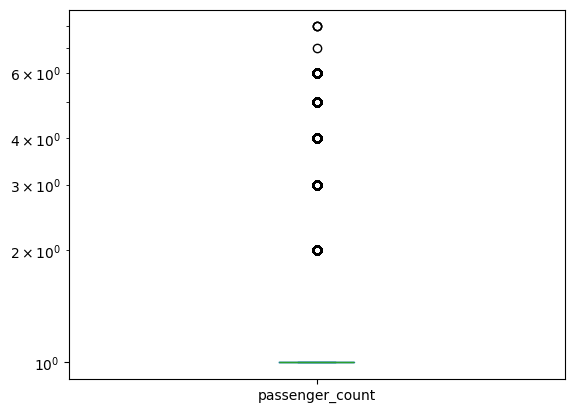

In [624]:
df['passenger_count'].plot(kind='box')
plt.yscale('log')
plt.show()

In [625]:
pct = df['passenger_count'].quantile([0.10, 0.25,0.50,0.75,0.90,0.95])
pct

0.10    1.0
0.25    1.0
0.50    1.0
0.75    1.0
0.90    2.0
0.95    3.0
Name: passenger_count, dtype: float64

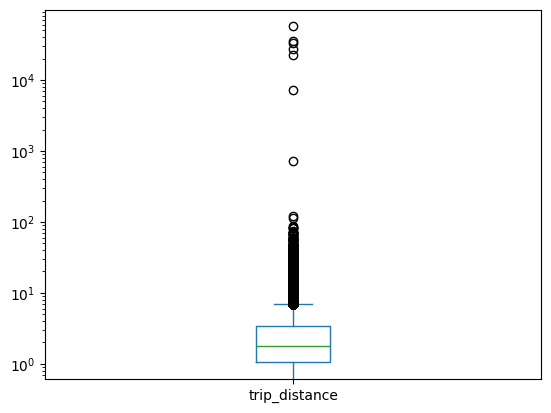

In [855]:
df['trip_distance'].plot(kind='box')
plt.yscale('log')
plt.show()

In [853]:
df['trip_distance'].max()

56823.8

In [627]:
pct = df['trip_distance'].quantile([0.10, 0.25,0.50,0.75,0.90, 0.99])
pct

0.10     0.65
0.25     1.05
0.50     1.79
0.75     3.40
0.90     9.12
0.99    20.22
Name: trip_distance, dtype: float64

In [628]:
df['trip_distance'].max()

56823.8

In [629]:
df['trip_distance'].value_counts(ascending=True).head(50)

trip_distance
23.13       1
25.48       1
24.35       1
59.42       1
32.39       1
27.24       1
35.36       1
37.90       1
29.64       1
34.40       1
43.72       1
41.94       1
28.56       1
27.78       1
34.10       1
27.64       1
35.67       1
23.98       1
25.24       1
29.43       1
23.34       1
28.08       1
25.19       1
35.83       1
35482.69    1
38.81       1
35.21       1
26.76       1
39.18       1
26.81       1
56.49       1
28.58       1
35.17       1
39.52       1
30.23       1
24.49       1
32.20       1
28.26       1
31.58       1
36.34       1
34.00       1
35.74       1
23.63       1
26.85       1
36.45       1
30.34       1
26.93       1
41.80       1
37.04       1
28.37       1
Name: count, dtype: int64

In [630]:
df['trip_distance'].describe()

count    249994.000000
mean          4.181437
std         166.242992
min           0.000000
25%           1.050000
50%           1.790000
75%           3.400000
max       56823.800000
Name: trip_distance, dtype: float64

In [631]:
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-2.4749999999999996
6.924999999999999


In [632]:
df['trip_distance'].value_counts().reset_index()['trip_distance'].sort_values()

0           0.00
346         0.01
410         0.02
485         0.03
581         0.04
          ...   
2808    22528.82
2479    27586.37
2844    33133.96
2875    35482.69
2636    56823.80
Name: trip_distance, Length: 2899, dtype: float64

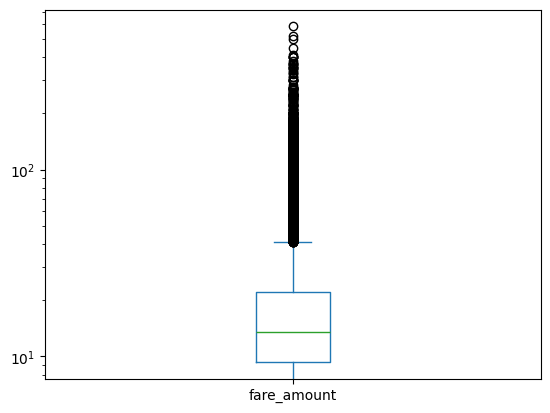

In [633]:
df['fare_amount'].plot(kind='box')
plt.yscale('log')

In [634]:
pct = df['fare_amount'].quantile([0.10, 0.25,0.50,0.75,0.90, 0.99])
pct

0.10     6.9060
0.25     9.3000
0.50    13.5000
0.75    22.0175
0.90    42.2000
0.99    77.2000
Name: fare_amount, dtype: float64

In [635]:
df['fare_amount'].max()

584.7

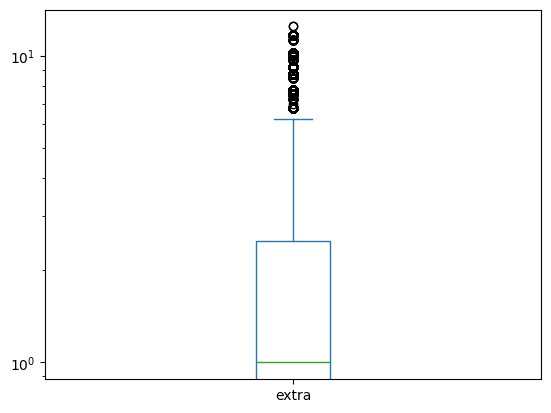

In [636]:
df['extra'].plot(kind='box')
plt.yscale('log')

In [637]:
Q1 = df['extra'].quantile(0.25)
Q3 = df['extra'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(upper_bound)
print(lower_bound)


6.25
-3.75


In [638]:
df['extra'].max()

12.5

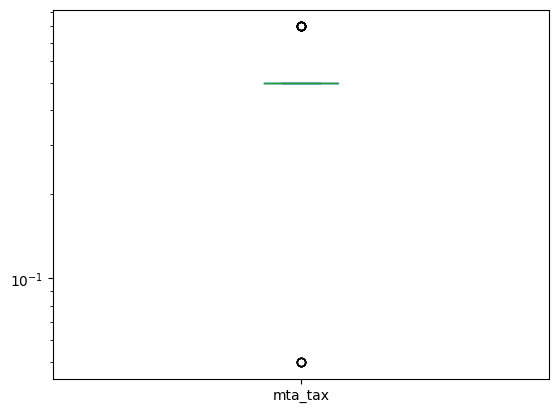

In [639]:
df['mta_tax'].plot(kind='box')
plt.yscale('log')
plt.show()

In [640]:
Q1 = df['mta_tax'].quantile(0.25)
Q3 = df['mta_tax'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(upper_bound)
print(lower_bound)

0.5
0.5


In [641]:
df['mta_tax'].describe()

count    249994.000000
mean          0.495354
std           0.048078
min           0.000000
25%           0.500000
50%           0.500000
75%           0.500000
max           0.800000
Name: mta_tax, dtype: float64

In [642]:
df['mta_tax'].max()

0.8

In [643]:
df['mta_tax'].min()

0.0

In [644]:
pct = df['mta_tax'].quantile([0.10, 0.25,0.50,0.75,0.90, 0.99])
pct

0.10    0.5
0.25    0.5
0.50    0.5
0.75    0.5
0.90    0.5
0.99    0.5
Name: mta_tax, dtype: float64

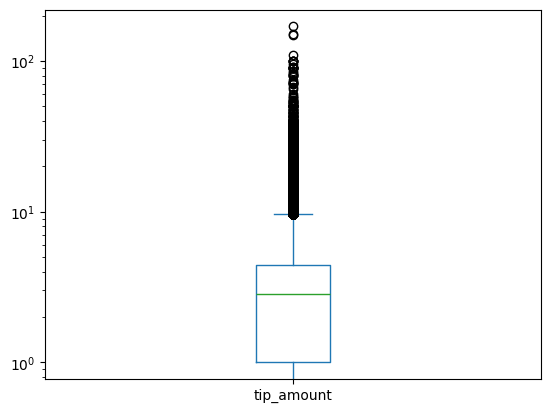

In [645]:
df['tip_amount'].plot(kind='box')
plt.yscale('log')
plt.show()

In [646]:
df['tip_amount'].min()

0.0

In [647]:
df['tip_amount'].max()

170.0

In [648]:
Q1 = df['tip_amount'].quantile(0.25)
Q3 = df['tip_amount'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(upper_bound)
print(lower_bound)

9.625
-4.175000000000001


In [649]:
pct = df['tip_amount'].quantile([0.10, 0.25,0.50,0.75,0.90, 0.99])
pct

0.10     0.00
0.25     1.00
0.50     2.85
0.75     4.45
0.90     7.56
0.99    17.65
Name: tip_amount, dtype: float64

In [650]:
df['tip_amount'].max()

170.0

In [651]:
df['tip_amount'].describe()

count    249994.000000
mean          3.553696
std           4.065062
min           0.000000
25%           1.000000
50%           2.850000
75%           4.450000
max         170.000000
Name: tip_amount, dtype: float64

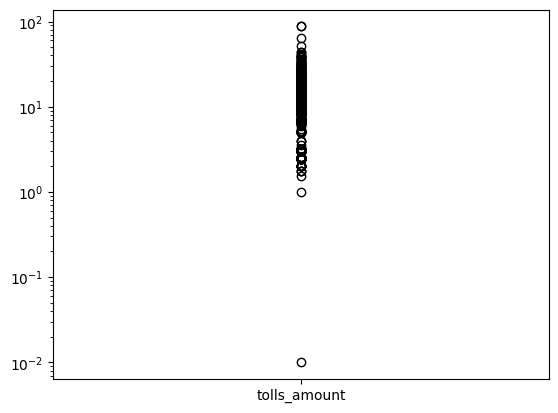

In [652]:
df['tolls_amount'].plot(kind='box')
plt.yscale('log')
plt.show()

In [653]:
Q1 = df['tolls_amount'].quantile(0.25)
Q3 = df['tolls_amount'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(upper_bound)
print(lower_bound)

0.0
0.0


In [654]:
df['tolls_amount'].max()

87.75

In [655]:
df['tolls_amount'].min()

0.0

In [656]:
df['tolls_amount'].value_counts().reset_index()['tolls_amount'].sort_values(ascending=False)

195    87.75
212    87.50
215    64.45
244    52.00
178    44.30
       ...  
68      1.75
214     1.55
231     1.00
122     0.01
0       0.00
Name: tolls_amount, Length: 261, dtype: float64

In [657]:
df['tolls_amount'].value_counts().head(50)

tolls_amount
0.00     229553
6.55      11183
6.94       7554
12.75       254
14.75       234
3.00         85
13.10        72
3.18         46
13.88        45
19.30        42
21.30        38
11.55        37
20.75        32
18.75        28
21.69        28
19.69        28
19.75        27
22.75        27
2.45         26
17.75        25
5.00         21
2.00         20
20.00        20
10.00        17
11.75        15
21.75        15
25.50        13
23.75        11
13.75        10
9.55         10
11.94        10
15.75         9
18.25         9
7.00          9
29.50         8
19.25         7
16.75         7
17.25         7
10.17         7
8.36          7
8.69          7
20.25         6
2.50          6
24.75         6
21.00         6
11.19         6
12.00         6
2.60          6
17.00         5
13.30         5
Name: count, dtype: int64

In [658]:
df['tolls_amount'].sort_values(ascending=False).astype(int).unique()

array([87, 64, 52, 44, 41, 40, 39, 38, 36, 35, 34, 33, 32, 31, 30, 29, 28,
       27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11,
       10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

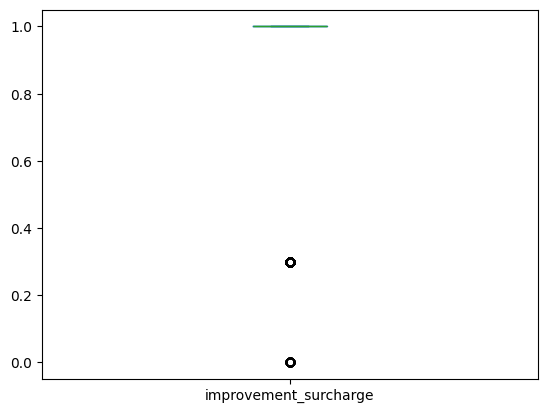

In [659]:
df['improvement_surcharge'].plot(kind='box')
#plt.yscale('log')
plt.show()

In [660]:
df['improvement_surcharge'].value_counts()

improvement_surcharge
1.0    249725
0.3       167
0.0       102
Name: count, dtype: int64

In [661]:
df['total_amount'].sort_values(ascending=False)

159055    588.70
11860     530.06
10663     508.50
185170    484.20
12305     481.20
           ...  
46037       0.00
53169       0.00
230945      0.00
242239      0.00
120691      0.00
Name: total_amount, Length: 249994, dtype: float64

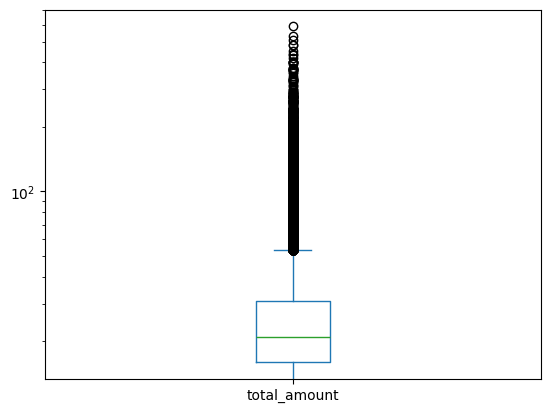

In [662]:
df['total_amount'].plot(kind='box')
plt.yscale('log')
plt.show()

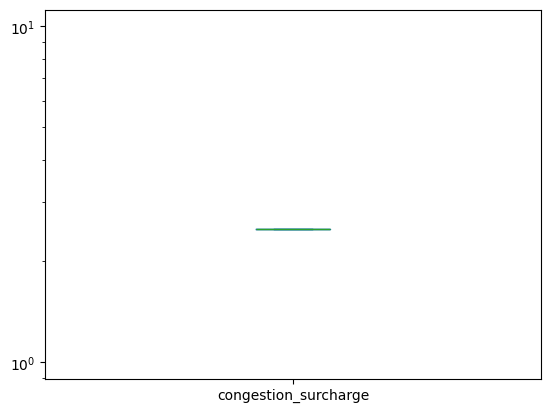

In [663]:
df['congestion_surcharge'].plot(kind='box')
plt.yscale('log')
plt.show()

In [664]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    231508
0.0     18486
Name: count, dtype: int64

In [665]:
df['combined_airport_fee'].value_counts()

combined_airport_fee
0.00    228630
1.75     16083
1.25      5280
1.00         1
Name: count, dtype: int64

In [666]:
num = df.select_dtypes(include=[np.number])
cont_cols = num.columns

univ_results = []
for col in cont_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    univ_results.append({
        "Feature":       col,
        "Lower Bound":   lower_bound,
        "Upper Bound":   upper_bound,
        "Outlier Count": int(mask.sum()),
        "Outlier %":     round(mask.mean() * 100, 2)
    })

univ_df = pd.DataFrame(univ_results)

print(univ_df.to_string(index=False))


              Feature  Lower Bound  Upper Bound  Outlier Count  Outlier %
             VendorID     -0.50000      3.50000             62       0.02
      passenger_count      1.00000      1.00000          56423      22.57
        trip_distance     -2.47500      6.92500          33016      13.21
           RatecodeID      1.00000      1.00000          13492       5.40
         PULocationID    -21.00000    387.00000              0       0.00
         DOLocationID    -66.00000    414.00000              0       0.00
         payment_type      1.00000      1.00000          52957      21.18
          fare_amount     -9.77625     41.09375          25989      10.40
                extra     -3.75000      6.25000           4526       1.81
              mta_tax      0.50000      0.50000           2341       0.94
           tip_amount     -4.17500      9.62500          19094       7.64
         tolls_amount      0.00000      0.00000          20441       8.18
improvement_surcharge      1.00000    

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

# Observations:

90% of data has fare_amount value less than or equals to 42.20 so keeping only 90% data and removing rest.

When trip distance is 0 75% fare_amount is less than or equals to 22. Keeping only 75% of data for trip_distance is 0.

Keeping 99% of tip_amount as it appears to be fare tip amount. 10.83

Keeping 6.55 Tolls Amount as it appears to be fare tolls amount. 6.55

In [667]:
# remove passenger_count > 6

print(df['passenger_count'].value_counts())
#df1 = df[df['passenger_count'] <= 6]
df1 = df[df['passenger_count'].le(6)]
print(df1['passenger_count'].value_counts())

passenger_count
1.0    193571
2.0     36791
3.0      9302
4.0      5091
5.0      3162
6.0      2073
8.0         3
7.0         1
Name: count, dtype: int64
passenger_count
1.0    193571
2.0     36791
3.0      9302
4.0      5091
5.0      3162
6.0      2073
Name: count, dtype: int64


In [668]:
# Continue with outlier handling
df2 = df1[(df1['trip_distance'].eq(0))]
sns.histplot(df2['fare_amount'], bins='rice')
#plt.xscale('log')


<Axes: xlabel='fare_amount', ylabel='Count'>

In [856]:
print(df1['fare_amount'].describe())
pct = df1['fare_amount'].quantile([0.10, 0.25,0.50,0.75,0.90])
print(pct)

count    249990.000000
mean         19.846232
std          18.248881
min           0.000000
25%           9.300000
50%          13.500000
75%          22.000000
max         584.700000
Name: fare_amount, dtype: float64
0.10     6.9
0.25     9.3
0.50    13.5
0.75    22.0
0.90    42.2
Name: fare_amount, dtype: float64


In [670]:
df1.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  249990.000000    249990.000000  249990.000000  249990.000000   
mean        1.732333         1.374739       4.181471       1.615473   
std         0.448310         0.865187     166.244321       7.286827   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         6.000000   56823.800000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  249990.000000  249990.000000  249990.000000  249990.000000   
mean      165.460414     164.075699       1.162867      19.846232   
std        64.021389      69.720389       0.507089      18.248881   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     114.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      22.000000   
max       265.000000     265.000000       4.000000     584.700000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  249990.000000  249990.000000  249990.000000  249990.000000   
mean        1.590899       0.495354       3.553520       0.603785   
std         1.831869       0.048078       4.064798       2.207896   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.447500       0.000000   
max        12.500000       0.800000     170.000000      87.750000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          249990.000000  249990.000000         249990.000000   
mean                0.999124      28.925711              2.315163   
std                 0.027103      22.845043              0.654164   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.930000              2.500000   
max                 1.000000     588.700000              2.500000   

       combined_airport_fee  
count         249990.000000  
mean               0.138991  
std                0.459034  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.750000

In [671]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249990 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               249990 non-null  int64  
 1   tpep_pickup_datetime   249990 non-null  object 
 2   tpep_dropoff_datetime  249990 non-null  object 
 3   passenger_count        249990 non-null  float64
 4   trip_distance          249990 non-null  float64
 5   RatecodeID             249990 non-null  float64
 6   PULocationID           249990 non-null  int64  
 7   DOLocationID           249990 non-null  int64  
 8   payment_type           249990 non-null  int64  
 9   fare_amount            249990 non-null  float64
 10  extra                  249990 non-null  float64
 11  mta_tax                249990 non-null  float64
 12  tip_amount             249990 non-null  float64
 13  tolls_amount           249990 non-null  float64
 14  improvement_surcharge  249990 non-null  f

In [861]:
# remove rows where distance is 0 and fare amount is greater than 70

df2 = df1[~(df1['fare_amount'].gt(42.20))]

In [859]:
df2.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  225264.000000    225264.000000  225264.000000  225264.000000   
mean        1.726801         1.362956       2.918282       1.436981   
std         0.448483         0.859904     165.154232       6.468085   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.000000       1.000000   
50%         2.000000         1.000000       1.620000       1.000000   
75%         2.000000         1.000000       2.710000       1.000000   
max         6.000000         6.000000   56823.800000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  225264.000000  225264.000000  225264.000000  225264.000000   
mean      167.879075     166.033654       1.159959      14.905344   
std        65.237960      69.032130       0.505261       8.204993   
min         1.000000       1.000000       0.000000       0.010000   
25%       137.000000     114.000000       1.000000       8.600000   
50%       162.000000     163.000000       1.000000      12.800000   
75%       234.000000     234.000000       1.000000      18.400000   
max       265.000000     265.000000       4.000000      42.200000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  225264.000000  225264.000000  225264.000000  225264.000000   
mean        1.487424       0.498804       2.857478       0.165671   
std         1.644220       0.024637       2.552901       1.093715   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.720000       0.000000   
75%         2.500000       0.500000       4.000000       0.000000   
max        11.750000       0.800000     170.000000      87.500000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          225264.000000  225264.000000         225264.000000   
mean                0.999437      22.718039              2.380662   
std                 0.021142      10.620468              0.533014   
min                 0.000000       1.010000              0.000000   
25%                 1.000000      15.480000              2.500000   
50%                 1.000000      20.000000              2.500000   
75%                 1.000000      26.880000              2.500000   
max                 1.000000     174.500000              2.500000   

       combined_airport_fee  
count         225264.000000  
mean               0.047733  
std                0.276057  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.750000

In [860]:
df2[df2['trip_distance'].eq(0)]['fare_amount'].quantile([0.10, 0.25, 0.50, 0.75, 0.90])

0.10     3.00
0.25     3.70
0.50    13.50
0.75    21.72
0.90    30.00
Name: fare_amount, dtype: float64

In [675]:
df3 = df2[~((df2['trip_distance'].eq(0))& (df2['fare_amount'].gt(0)))]

In [676]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221189 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               221189 non-null  int64  
 1   tpep_pickup_datetime   221189 non-null  object 
 2   tpep_dropoff_datetime  221189 non-null  object 
 3   passenger_count        221189 non-null  float64
 4   trip_distance          221189 non-null  float64
 5   RatecodeID             221189 non-null  float64
 6   PULocationID           221189 non-null  int64  
 7   DOLocationID           221189 non-null  int64  
 8   payment_type           221189 non-null  int64  
 9   fare_amount            221189 non-null  float64
 10  extra                  221189 non-null  float64
 11  mta_tax                221189 non-null  float64
 12  tip_amount             221189 non-null  float64
 13  tolls_amount           221189 non-null  float64
 14  improvement_surcharge  221189 non-null  f

In [677]:
df3[((df3['trip_distance'].eq(0)) & (df3['fare_amount'].eq(0)) & (df3['PULocationID'].ne(df3['DOLocationID'])))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
28946          1  2023-10-20 11:05:37   2023-10-20 11:05:37              1.0   
80314          1  2023-12-20 13:40:27   2023-12-20 13:40:27              1.0   
84310          1  2023-09-29 11:12:42   2023-09-29 11:12:42              1.0   
102171         1  2023-11-07 08:42:41   2023-11-07 08:42:41              1.0   
155547         1  2023-07-03 19:09:35   2023-07-03 19:57:21              1.0   
159570         1  2023-10-28 11:10:27   2023-10-28 11:10:27              1.0   
169939         1  2023-06-28 21:29:09   2023-06-28 21:32:08              1.0   
207081         2  2023-05-19 10:55:37   2023-05-19 10:55:44              1.0   
230945         1  2023-11-17 13:28:12   2023-11-17 13:52:16              1.0   
245898         1  2023-01-29 18:33:14   2023-01-29 18:33:14              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
28946             0.0         1.0           137           264             3   
80314             0.0         5.0           138           264             2   
84310             0.0         5.0           128           264             2   
102171            0.0         1.0           237           264             2   
155547            0.0         1.0            89            39             1   
159570            0.0         5.0           246           264             2   
169939            0.0         1.0           246            90             1   
207081            0.0         1.0             7           193             1   
230945            0.0        99.0            74           234             1   
245898            0.0         5.0           261           264             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
28946           0.0   0.00      0.0         0.0           0.0   
80314           0.0   9.25      0.0         0.0           0.0   
84310           0.0   0.00      0.0         0.0           0.0   
102171          0.0   0.00      0.0         0.0           0.0   
155547          0.0   0.00      0.0         0.0           0.0   
159570          0.0   2.50      0.0         0.0           0.0   
169939          0.0   0.00      0.0         0.0           0.0   
207081          0.0   0.00      0.5         0.0           0.0   
230945          0.0   0.00      0.0         0.0           0.0   
245898          0.0   0.00      0.0         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
28946                     0.0          0.00                   0.0   
80314                     1.0         10.25                   2.5   
84310                     0.0          0.00                   0.0   
102171                    0.0          0.00                   0.0   
155547                    0.0          0.00                   0.0   
159570                    1.0          3.50                   2.5   
169939                    0.0          0.00                   0.0   
207081                    1.0          1.50                   0.0   
230945                    0.0          0.00                   0.0   
245898                    0.0          0.00                   0.0   

        combined_airport_fee  
28946                   0.00  
80314                   1.75  
84310                   0.00  
102171                  0.00  
155547                  0.00  
159570                  0.00  
169939                  0.00  
207081                  0.00  
230945                  0.00  
245898                  0.00

In [678]:
# Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)

df4 = df3[~((df3['trip_distance'].eq(0)) & (df3['fare_amount'].eq(0)) & (df3['PULocationID'].ne(df3['DOLocationID'])))]

In [679]:
# Entries where `trip_distance` is more than 250  miles.

df5 = df4[~(df4['trip_distance'].gt(250))]

In [680]:
# Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

df6 = df5[~(df5['payment_type'].eq(0))]

In [681]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215220 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               215220 non-null  int64  
 1   tpep_pickup_datetime   215220 non-null  object 
 2   tpep_dropoff_datetime  215220 non-null  object 
 3   passenger_count        215220 non-null  float64
 4   trip_distance          215220 non-null  float64
 5   RatecodeID             215220 non-null  float64
 6   PULocationID           215220 non-null  int64  
 7   DOLocationID           215220 non-null  int64  
 8   payment_type           215220 non-null  int64  
 9   fare_amount            215220 non-null  float64
 10  extra                  215220 non-null  float64
 11  mta_tax                215220 non-null  float64
 12  tip_amount             215220 non-null  float64
 13  tolls_amount           215220 non-null  float64
 14  improvement_surcharge  215220 non-null  f

In [682]:
df6['tip_amount'].max()

150.29

In [683]:
pct = df6['tip_amount'].quantile([0.10, 0.25,0.50,0.75,0.90, 0.99])
pct

0.10     0.00
0.25     1.00
0.50     2.75
0.75     4.03
0.90     5.68
0.99    10.83
Name: tip_amount, dtype: float64

In [684]:
df7 = df6[df6['tip_amount'].le(10.83)]

In [685]:
pct = df7['tolls_amount'].quantile([0.10, 0.25,0.50,0.75,0.90, 0.99])
pct

0.10    0.00
0.25    0.00
0.50    0.00
0.75    0.00
0.90    0.00
0.99    6.55
Name: tolls_amount, dtype: float64

In [686]:
df7['tolls_amount'].value_counts()

tolls_amount
0.00     209550
6.55       2115
6.94       1249
3.00         31
2.00         19
12.75        16
3.18         15
13.10        12
14.75         9
5.00          8
11.55         6
2.50          5
2.45          4
11.94         4
2.60          2
10.00         2
13.88         2
13.30         2
12.00         1
6.11          1
11.75         1
15.00         1
25.50         1
6.25          1
13.69         1
19.69         1
14.00         1
0.01          1
14.50         1
8.00          1
1.00          1
4.00          1
9.40          1
64.45         1
13.75         1
1.75          1
11.50         1
10.55         1
15.69         1
31.15         1
Name: count, dtype: int64

In [687]:
df8 = df7[df7['tolls_amount'].le(6.55)]

In [688]:
df8['tolls_amount'].value_counts().reset_index().sort_values('count', ascending=False).head(50)

tolls_amount   count
0           0.00  209550
1           6.55    2115
2           3.00      31
3           2.00      19
4           3.18      15
5           5.00       8
6           2.50       5
7           2.45       4
8           2.60       2
9           6.25       1
10          1.75       1
11          4.00       1
12          1.00       1
13          0.01       1
14          6.11       1

In [689]:
# Do any columns need standardising?

df8.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-07-27 07:47:05   2023-07-27 07:59:24              1.0   
1         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
3         2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
4         2  2023-06-08 19:18:44   2023-06-08 19:27:16              2.0   
6         2  2023-12-22 00:34:11   2023-12-22 00:48:28              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           2.32         1.0           113           230             2   
1           3.39         1.0           231           230             1   
3           0.95         1.0           246           186             1   
4           1.97         1.0           143           238             1   
6           2.53         1.0           140           143             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         14.2    0.0      0.5        0.00           0.0   
1         21.9    1.0      0.5        5.38           0.0   
3          9.3    2.5      0.5        4.74           0.0   
4         12.1    2.5      0.5        1.00           0.0   
6         15.6    1.0      0.5        4.12           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    1.0         18.20                   2.5   
1                    1.0         32.28                   2.5   
3                    1.0         20.54                   2.5   
4                    1.0         19.60                   2.5   
6                    1.0         24.72                   2.5   

   combined_airport_fee  
0                   0.0  
1                   0.0  
3                   0.0  
4                   0.0  
6                   0.0

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [690]:
df8.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'combined_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical? All are Numerical variables


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [691]:
df8["tpep_pickup_datetime"] = pd.to_datetime(df8["tpep_pickup_datetime"], errors="coerce")

In [692]:
# Find and show the hourly trends in taxi pickups

df8['pickup_hour'] = df8['tpep_pickup_datetime'].dt.hour


In [693]:
hourly_df = df8.groupby('pickup_hour').size().reset_index(name='pickup_count')

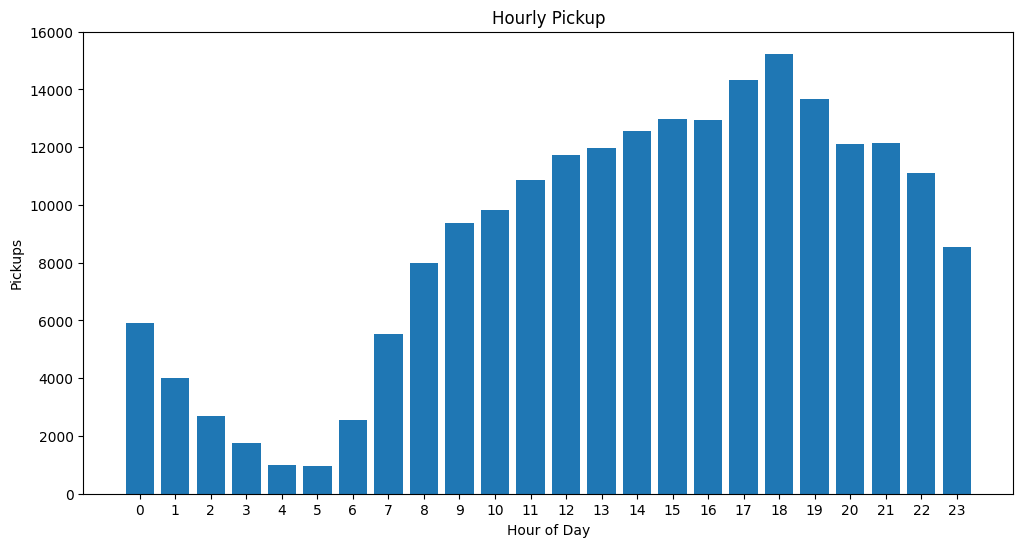

In [696]:
df8["day"] = df8["tpep_pickup_datetime"].dt.day_name()
plt.figure(figsize=(12,6))
plt.bar(hourly_df["pickup_hour"], hourly_df['pickup_count'])
plt.xticks(range(0, 24))
plt.xlabel("Hour of Day")
plt.ylabel("Pickups")
plt.title("Hourly Pickup")
plt.show()

In [697]:
df8['day'].value_counts().reset_index()

day  count
0   Thursday  33476
1  Wednesday  32808
2   Saturday  31459
3     Friday  31254
4    Tuesday  30483
5     Sunday  26140
6     Monday  26135

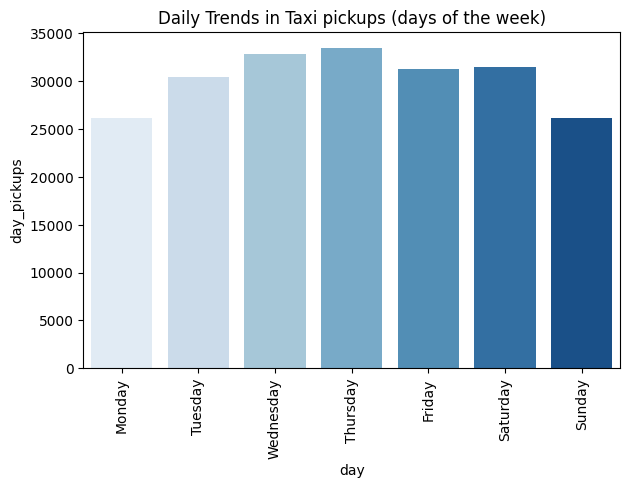

In [698]:
# Find and show the daily trends in taxi pickups (days of the week)
df8["day"] = df8["tpep_pickup_datetime"].dt.day_name()
daily_df = df8.groupby("day").size().reset_index(name="day_pickups")
#daily_df.plot(kind='bar')
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=daily_df, x='day', y='day_pickups', order= order, palette='Blues')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Daily Trends in Taxi pickups (days of the week)")
plt.show()

        month  monthly_count
0       April          18250
1      August          15260
2    December          18108
3    February          16725
4     January          17583
5        July          16169
6        June          18530
7       March          19055
8         May          19616
9    November          18136
10    October          19103
11  September          15220


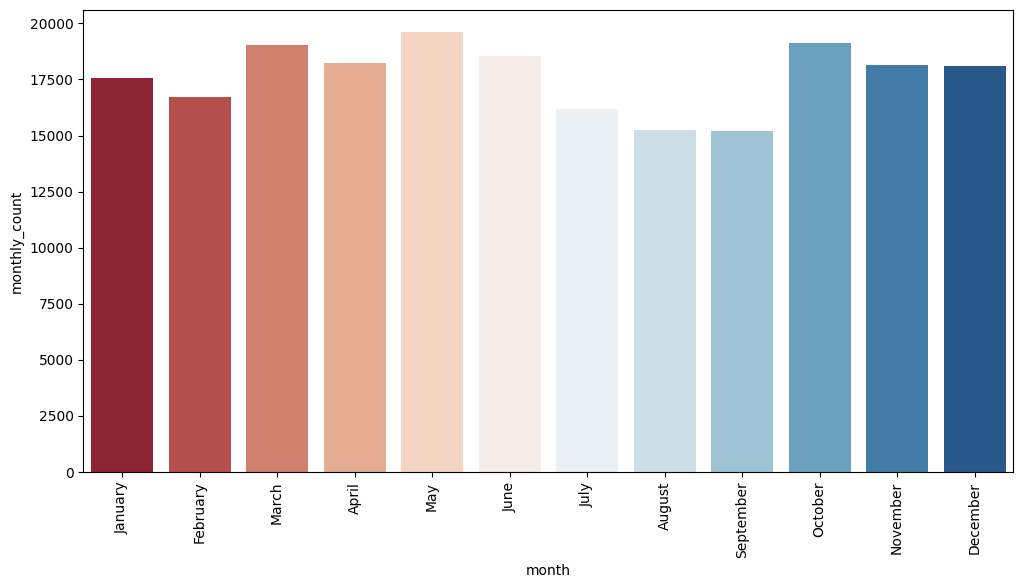

In [701]:
# Show the monthly trends in pickups

plt.figure(figsize=(12,6))
df8['month'] = df8['tpep_pickup_datetime'].dt.month_name()
df8['month']
monthly_df = df8.groupby("month").size().reset_index(name="monthly_count")
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print(monthly_df)
sns.barplot(data=monthly_df, x = 'month', y = 'monthly_count', order=month_order, palette='RdBu')
plt.xticks(rotation=90)
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [702]:
# Analyse the above parameters
df8.describe()


VendorID           tpep_pickup_datetime  passenger_count  \
count  211755.000000                         211755    211755.000000   
mean        1.732068  2023-06-30 17:08:49.936790272         1.378508   
min         1.000000            2023-01-01 00:05:12         1.000000   
25%         1.000000     2023-03-31 13:27:55.500000         1.000000   
50%         2.000000            2023-06-24 01:11:24         1.000000   
75%         2.000000            2023-10-05 00:41:21         1.000000   
max         2.000000            2023-12-31 23:57:12         6.000000   
std         0.442883                            NaN         0.875375   

       trip_distance     RatecodeID   PULocationID   DOLocationID  \
count  211755.000000  211755.000000  211755.000000  211755.000000   
mean        2.141826       1.401322     168.433307     166.424321   
min         0.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000     137.000000     114.000000   
50%         1.600000       1.000000     163.000000     163.000000   
75%         2.630000       1.000000     234.000000     236.000000   
max        57.500000      99.000000     265.000000     265.000000   
std         1.730561       6.233450      65.075029      68.986702   

        payment_type   fare_amount          extra        mta_tax  \
count  211755.000000  211755.00000  211755.000000  211755.000000   
mean        1.198446      14.44277       1.486681       0.499462   
min         1.000000       0.00000       0.000000       0.000000   
25%         1.000000       8.60000       0.000000       0.500000   
50%         1.000000      12.10000       1.000000       0.500000   
75%         1.000000      17.70000       2.500000       0.500000   
max         4.000000      42.20000      11.750000       0.800000   
std         0.454972       7.67108       1.564416       0.016733   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  211755.000000  211755.000000          211755.000000  211755.000000   
mean        2.767497       0.066674               0.999569      22.046987   
min         0.000000       0.000000               0.000000       0.000000   
25%         1.000000       0.000000               1.000000      15.450000   
50%         2.720000       0.000000               1.000000      19.680000   
75%         4.000000       0.000000               1.000000      26.250000   
max        10.830000       6.550000               1.000000      72.000000   
std         2.147509       0.654357               0.018580       9.368249   

       congestion_surcharge  combined_airport_fee    pickup_hour  
count         211755.000000         211755.000000  211755.000000  
mean               2.391726              0.035236      14.323959  
min                0.000000              0.000000       0.000000  
25%                2.500000              0.000000      11.000000  
50%                2.500000              0.000000      15.000000  
75%                2.500000              0.000000      19.000000  
max                2.500000              1.750000      23.000000  
std                0.508883              0.236639       5.777983

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [703]:
# Create a df with non zero entries for the selected parameters.
non_zero_df = df8[~((df8['fare_amount'].eq(0)) | (df8['tip_amount'].eq(0)) | (df8['total_amount'].eq(0)) | (df8['trip_distance'].eq(0)))]


In [704]:
non_zero_df.describe()

VendorID           tpep_pickup_datetime  passenger_count  \
count  166234.000000                         166234    166234.000000   
mean        1.739085  2023-07-01 00:03:18.793363456         1.364655   
min         1.000000            2023-01-01 00:05:12         1.000000   
25%         1.000000  2023-03-31 10:50:54.249999872         1.000000   
50%         2.000000            2023-06-23 21:34:37         1.000000   
75%         2.000000            2023-10-06 00:44:23         1.000000   
max         2.000000            2023-12-31 23:57:12         6.000000   
std         0.439135                            NaN         0.864220   

       trip_distance     RatecodeID   PULocationID   DOLocationID  \
count  166234.000000  166234.000000  166234.000000  166234.000000   
mean        2.131858       1.002178     169.709319     167.949752   
min         0.010000       1.000000       4.000000       3.000000   
25%         1.030000       1.000000     138.000000     125.000000   
50%         1.630000       1.000000     163.000000     163.000000   
75%         2.630000       1.000000     236.000000     236.000000   
max        14.100000       5.000000     265.000000     265.000000   
std         1.653429       0.090624      64.792223      68.588569   

        payment_type    fare_amount          extra        mta_tax  \
count  166234.000000  166234.000000  166234.000000  166234.000000   
mean        1.000054      14.428401       1.502831       0.499658   
min         1.000000       2.800000       0.000000       0.000000   
25%         1.000000       8.600000       0.000000       0.500000   
50%         1.000000      12.800000       1.000000       0.500000   
75%         1.000000      17.700000       2.500000       0.500000   
max         4.000000      42.200000      11.750000       0.800000   
std         0.010113       7.480737       1.556787       0.013459   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  166234.000000  166234.000000          166234.000000  166234.000000   
mean        3.525340       0.065016               0.999731      22.839090   
min         0.010000       0.000000               0.300000       6.200000   
25%         2.250000       0.000000               1.000000      16.170000   
50%         3.150000       0.000000               1.000000      20.500000   
75%         4.400000       0.000000               1.000000      26.880000   
max        10.830000       6.550000               1.000000      72.000000   
std         1.789697       0.646358               0.013732       9.370974   

       congestion_surcharge  combined_airport_fee    pickup_hour  
count         166234.000000         166234.000000  166234.000000  
mean               2.433994              0.026309      14.436126  
min                0.000000              0.000000       0.000000  
25%                2.500000              0.000000      11.000000  
50%                2.500000              0.000000      15.000000  
75%                2.500000              0.000000      19.000000  
max                2.500000              1.750000      23.000000  
std                0.400824              0.205057       5.807506

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [705]:
non_zero_df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
3         2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
4         2  2023-06-08 19:18:44   2023-06-08 19:27:16              2.0   
6         2  2023-12-22 00:34:11   2023-12-22 00:48:28              1.0   
7         2  2023-10-04 16:50:57   2023-10-04 16:57:42              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1           3.39         1.0           231           230             1   
3           0.95         1.0           246           186             1   
4           1.97         1.0           143           238             1   
6           2.53         1.0           140           143             1   
7           0.62         1.0           249            68             1   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
1         21.9  ...      0.5        5.38           0.0                    1.0   
3          9.3  ...      0.5        4.74           0.0                    1.0   
4         12.1  ...      0.5        1.00           0.0                    1.0   
6         15.6  ...      0.5        4.12           0.0                    1.0   
7          7.9  ...      0.5        2.88           0.0                    1.0   

   total_amount  congestion_surcharge  combined_airport_fee  pickup_hour  \
1         32.28                   2.5                   0.0           23   
3         20.54                   2.5                   0.0           19   
4         19.60                   2.5                   0.0           19   
6         24.72                   2.5                   0.0            0   
7         17.28                   2.5                   0.0           16   

         day     month  
1   Thursday  December  
3    Tuesday  November  
4   Thursday      June  
6     Friday  December  
7  Wednesday   October  

[5 rows x 21 columns]

In [706]:
# Group data by month and analyse monthly revenue
monthly_df = non_zero_df.groupby('month').agg( monthly_revenue = ("total_amount", "sum"),
                                 monthly_trip_count = ("total_amount", "count")
                                ).reset_index()


In [707]:
sns.barplot(data = monthly_df, x = 'month', y = 'monthly_revenue', order = month_order)
plt.xticks(rotation = 90)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

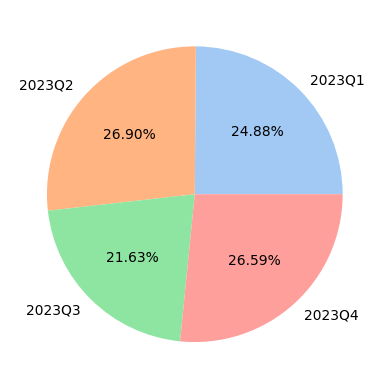

In [709]:
# Calculate proportion of each quarter

non_zero_df['quarter'] = non_zero_df['tpep_pickup_datetime'].dt.to_period("Q")
quarter_df = non_zero_df.groupby("quarter")["total_amount"].sum().reset_index(name="quarter_revenue")

Total_revenue = quarter_df['quarter_revenue'].sum()
quarter_df["proportion"] = quarter_df["quarter_revenue"] / Total_revenue * 100
colors = sns.color_palette('pastel')
plt.pie(quarter_df['proportion'], labels=quarter_df['quarter'], autopct='%1.2f%%', colors=colors)
#quarter_df
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

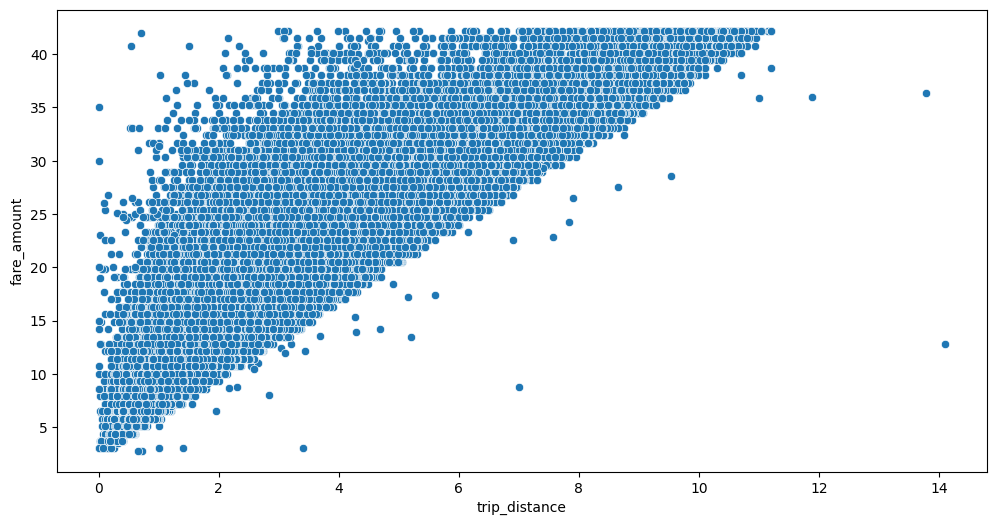

In [710]:
# Show how trip fare is affected by distance
plt.figure(figsize=(12,6))
sns.scatterplot(data=non_zero_df, x="trip_distance", y="fare_amount")



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [711]:
# Show relationship between fare and trip duration
non_zero_df["tpep_dropoff_datetime"] = pd.to_datetime(non_zero_df["tpep_dropoff_datetime"], errors="coerce")
non_zero_df['trip_duration'] = (non_zero_df["tpep_dropoff_datetime"] - non_zero_df["tpep_pickup_datetime"]).dt.total_seconds()/60

plt.scatter(data=non_zero_df, x='trip_duration', y='fare_amount')


In [712]:
correlation = non_zero_df['trip_duration'].corr(non_zero_df['fare_amount'])
print(correlation)
correlation = non_zero_df['trip_duration'].corr(non_zero_df['fare_amount'], method='pearson')
print(correlation)
correlation = non_zero_df['trip_duration'].corr(non_zero_df['fare_amount'], method='kendall')
print(correlation)
correlation = non_zero_df['trip_duration'].corr(non_zero_df['fare_amount'], method='spearman')
print(correlation)

0.21300410047307386
0.21300410047307386
0.8457873919341068
0.9593262220041668


<Axes: >

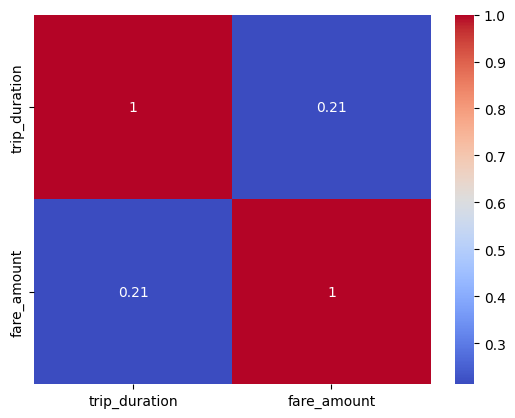

In [713]:
sns.heatmap(non_zero_df[['trip_duration', 'fare_amount']].corr(), annot=True, cmap='coolwarm')

In [714]:
trip_df = non_zero_df[(non_zero_df['trip_duration'] <=37.279167) & (non_zero_df['trip_duration']>0)]

<Axes: xlabel='trip_duration', ylabel='fare_amount'>

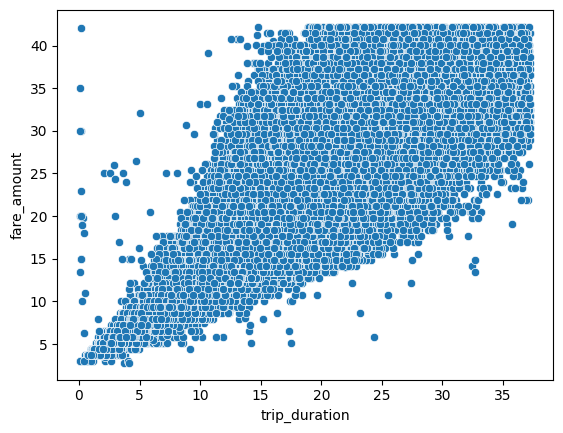

In [715]:
sns.scatterplot(data = trip_df, x = "trip_duration", y = "fare_amount")

In [716]:
# Show relationship between fare and number of passengers
sns.scatterplot(data = non_zero_df, x = "fare_amount", y = "passenger_count")


<Axes: xlabel='fare_amount', ylabel='passenger_count'>

In [717]:
correlation = non_zero_df['fare_amount'].corr(non_zero_df['passenger_count'], method='pearson')
print("Pearson Correlatoin: {}".format(correlation))
correlation = non_zero_df['fare_amount'].corr(non_zero_df['passenger_count'], method='kendall')
print("Kendall Correlatoin: {}".format(correlation))
correlation = non_zero_df['fare_amount'].corr(non_zero_df['passenger_count'], method='spearman')
print("Spearman Correlatoin: {}".format(correlation))

Pearson Correlatoin: 0.015162030092277191
Kendall Correlatoin: 0.019918177267637456
Spearman Correlatoin: 0.024700877680173636


<Axes: >

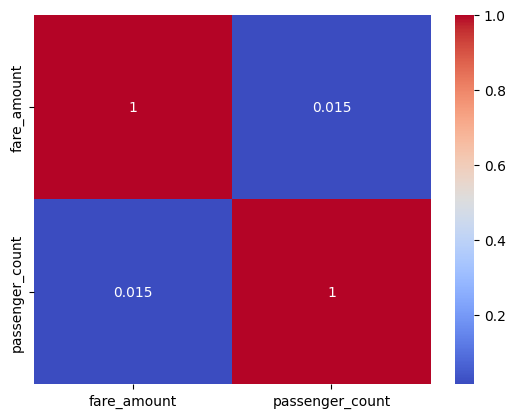

In [718]:
sns.heatmap(non_zero_df[['fare_amount', 'passenger_count']].corr(), annot=True, cmap='coolwarm')

In [719]:
# Show relationship between tip and trip distance
sns.scatterplot(data = non_zero_df, x = "tip_amount", y = "trip_distance")


<Axes: xlabel='tip_amount', ylabel='trip_distance'>

In [720]:
correlation = non_zero_df['tip_amount'].corr(non_zero_df['trip_distance'], method='kendall')
print("Kendall Correlation: ")
print(correlation)

correlation = non_zero_df['tip_amount'].corr(non_zero_df['trip_distance'], method='pearson')
print("Pearson Correlation:")
print(correlation)

correlation = non_zero_df['tip_amount'].corr(non_zero_df['trip_distance'], method='spearman')
print("Sperman Correlation: ")
print(correlation)

Kendall Correlation: 
0.4584545633122281
Pearson Correlation:
0.6685792779469257
Sperman Correlation: 
0.609472131282551


In [721]:
sns.heatmap(non_zero_df[['tip_amount', 'trip_distance']].corr(), annot=True, cmap='coolwarm')

<Axes: >

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [722]:
# Analyse the distribution of different payment types (payment_type).

payment_type_df = non_zero_df["payment_type"].value_counts().reset_index()
payment_type = {1: 'Credit Card',
                2: 'Cash',
                3: 'No change',
                4: 'Dispute',
                5: 'Unknown',
                6: 'Voided Trip'}
payment_type = ['Credit card', 'Cash', 'No change', 'Dispute', 'Unknown', 'Voided trip']

payment_type_df['payment_name'] = payment_type_df['payment_type'].apply(lambda p: payment_type[p])
plt.bar(payment_type_df["payment_name"].astype(str), payment_type_df["count"])
plt.xticks(ticks=payment_type, rotation=90)
plt.yscale('log')



In [723]:
payment_type_df

payment_type   count payment_name
0             1  166228         Cash
1             2       4    No change
2             3       1      Dispute
3             4       1      Unknown

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [724]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/Users/vidyabhushan/Documents/UpGrad/EDA/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/taxi_zones/taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

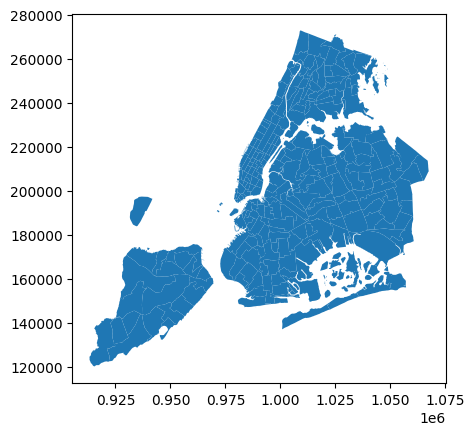

In [725]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [726]:
# Merge zones and trip records using locationID and PULocationID

merged_df = non_zero_df.merge( zones[['OBJECTID','Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry']],
                              left_on = 'PULocationID', right_on = 'LocationID', how = 'left')

merged_df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
1         2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
2         2  2023-06-08 19:18:44   2023-06-08 19:27:16              2.0   
3         2  2023-12-22 00:34:11   2023-12-22 00:48:28              1.0   
4         2  2023-10-04 16:50:57   2023-10-04 16:57:42              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.39         1.0           231           230             1   
1           0.95         1.0           246           186             1   
2           1.97         1.0           143           238             1   
3           2.53         1.0           140           143             1   
4           0.62         1.0           249            68             1   

   fare_amount  ...     month  quarter  trip_duration  OBJECTID  Shape_Leng  \
0         21.9  ...  December   2023Q4      22.850000     231.0    0.063420   
1          9.3  ...  November   2023Q4       8.400000     246.0    0.069467   
2         12.1  ...      June   2023Q2       8.533333     143.0    0.054180   
3         15.6  ...  December   2023Q4      14.283333     140.0    0.047584   
4          7.9  ...   October   2023Q4       6.750000     249.0    0.036384   

   Shape_Area                       zone  LocationID    borough  \
0    0.000167       TriBeCa/Civic Center       231.0  Manhattan   
1    0.000281  West Chelsea/Hudson Yards       246.0  Manhattan   
2    0.000151        Lincoln Square West       143.0  Manhattan   
3    0.000114            Lenox Hill East       140.0  Manhattan   
4    0.000072               West Village       249.0  Manhattan   

                                            geometry  
0  POLYGON ((981667.364 203305, 981854.109 203130...  
1  POLYGON ((983031.177 217138.506, 983640.32 216...  
2  POLYGON ((989338.1 223572.253, 989368.225 2235...  
3  POLYGON ((995735.062 215619.835, 995670.105 21...  
4  POLYGON ((983555.319 204876.901, 983469.158 20...  

[5 rows x 30 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [727]:
# Group data by location and calculate the number of trips

trip_count_df = merged_df.groupby('PULocationID').size().reset_index(name='trip_count')

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [728]:
# Merge trip counts back to the zones GeoDataFrame

trip_zone_df = zones.merge(trip_count_df, how = 'left', left_on='LocationID', right_on='PULocationID')
#trip_zone_df['trip_count'].sort_values(ascending=False)


In [864]:
trip_zone_df['trip_count'] = trip_zone_df['trip_count'].fillna(0)

# Plot
fig, ax = plt.subplots(1, 1, figsize = (12,10))
trip_zone_df.plot(column='trip_count', cmap='viridis', legend=True, edgecolor='black', ax=ax)
plt.title('Number of Taxi Trips per Zone in NYC (Pickup Zones)', fontsize=16)
plt.axis('off')
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [863]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12,10))

# Plot the map and display it
trip_zone_df.plot(column='trip_count', ax=ax, legend = True, legend_kwds= {'label': 'Total No.of pickup zone', 'orientation': 'horizontal'})
plt.show()


In [730]:
# can you try displaying the zones DF sorted by the number of trips?
trip_zone_df.sort_values(by='trip_count', ascending=False)


OBJECTID  Shape_Leng  Shape_Area                      zone  LocationID  \
236       237    0.042213    0.000096     Upper East Side South         237   
160       161    0.035804    0.000072            Midtown Center         161   
235       236    0.044252    0.000103     Upper East Side North         236   
161       162    0.035270    0.000048              Midtown East         162   
141       142    0.038176    0.000076       Lincoln Square East         142   
..        ...         ...         ...                       ...         ...   
252       253    0.036051    0.000078             Willets Point         253   
253       254    0.085886    0.000360  Williamsbridge/Olinville         254   
256       257    0.058669    0.000139           Windsor Terrace         257   
257       258    0.089013    0.000366                 Woodhaven         258   
258       259    0.126750    0.000395        Woodlawn/Wakefield         259   

       borough                                           geometry  \
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
141  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
..         ...                                                ...   
252     Queens  POLYGON ((1028825.348 218121.42, 1029152.461 2...   
253      Bronx  POLYGON ((1025214.477 259577.301, 1025348.099 ...   
256   Brooklyn  POLYGON ((989842.548 179997.856, 989842.643 17...   
257     Queens  POLYGON ((1027223.758 190451.926, 1027233.961 ...   
258      Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   

     PULocationID  trip_count  
236         237.0      9054.0  
160         161.0      8316.0  
235         236.0      8215.0  
161         162.0      6531.0  
141         142.0      6355.0  
..            ...         ...  
252           NaN         NaN  
253           NaN         NaN  
256           NaN         NaN  
257           NaN         NaN  
258           NaN         NaN  

[263 rows x 9 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [733]:
# Find routes which have the slowest speeds at different times of the day
merged_df['hour'] = merged_df['tpep_dropoff_datetime'].dt.hour
merged_df['trip_duration'] = (merged_df['tpep_dropoff_datetime'] - merged_df['tpep_pickup_datetime']).dt.total_seconds() / 3600
merged_df['speed'] = merged_df['trip_distance']/merged_df['trip_duration']
merged_df["route"] = merged_df["PULocationID"].astype(str) + "--" + merged_df["DOLocationID"].astype(str)
route_speed_df = merged_df.groupby(['route', 'hour'])['speed'].mean().reset_index()
slowest_speed = route_speed_df.groupby('hour')['speed'].idxmin()
#slowest_speed
slowest_speed_routes_df = route_speed_df.loc[slowest_speed].sort_values(by='hour')
slowest_speed_routes_df

route  hour      speed
28888  238--243     0   0.218268
38417   68--226     1 -10.952706
26435   234--90     2   2.593660
28010  237--238     3   0.120376
36392   48--152     4   0.232094
4      100--100     5   4.664452
34572  264--164     6   5.286713
21849  229--164     7   3.632419
4971   132--132     8   0.127952
2876   114--114     9   2.857143
10941  144--234    10   0.072722
20628   209--87    11   1.628571
35671    43--24    12   0.073755
32678  261--231    13   1.867220
19187  186--100    14   2.290117
17364  164--256    15   0.219878
35080    41--41    16   0.023069
32502   261--13    17   1.733800
26133  234--256    18   0.135555
5726   137--230    19   3.583278
41000    80--80    20   1.655172
403    100--186    21   3.242236
38496   68--232    22   0.112500
19     100--100    23   2.409231

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [734]:
hourly = merged_df.groupby("hour").size().reset_index(name="trip_count").sort_values(by="hour")
hourly

hour  trip_count
0      0        5148
1      1        3485
2      2        2348
3      3        1378
4      4         781
5      5         577
6      6        1575
7      7        3806
8      8        5952
9      9        7205
10    10        7372
11    11        7797
12    12        8810
13    13        8946
14    14        9348
15    15        9907
16    16        9875
17    17       10977
18    18       12460
19    19       11717
20    20        9941
21    21        9917
22    22        9475
23    23        7438

<Axes: >

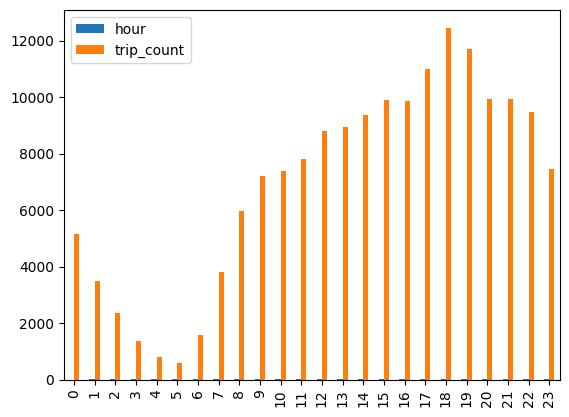

In [735]:
hourly.plot(kind='bar')

In [736]:
hourly

hour  trip_count
0      0        5148
1      1        3485
2      2        2348
3      3        1378
4      4         781
5      5         577
6      6        1575
7      7        3806
8      8        5952
9      9        7205
10    10        7372
11    11        7797
12    12        8810
13    13        8946
14    14        9348
15    15        9907
16    16        9875
17    17       10977
18    18       12460
19    19       11717
20    20        9941
21    21        9917
22    22        9475
23    23        7438

In [737]:
busiest_hour = hourly[hourly['trip_count'] == hourly['trip_count'].max()]['hour'].iloc[0]
busiest_hour_trips = hourly['trip_count'].max()
print(busiest_hour)
print(busiest_hour_trips)

18
12460


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [738]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
sample_data = merged_df['hour'].value_counts().sort_index()
#sample_data
scaled_value = (sample_data/sample_fraction).astype(int)
scaled_value.sort_values(ascending=False).head()

hour
18    249200
19    234340
17    219540
20    198820
21    198340
Name: count, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [739]:
# Compare traffic trends for the week days and weekends

merged_df['week_day'] = merged_df['tpep_pickup_datetime'].dt.dayofweek
merged_df['weekend_or_weekday'] = merged_df['week_day'].apply(lambda w: 'Weekend' if w >= 5 else 'Weekday')

In [740]:
traffic_pattern = merged_df.groupby(['weekend_or_weekday', 'hour']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.lineplot(data = traffic_pattern, x = 'hour', y='count', hue='weekend_or_weekday', marker='o')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [741]:
# Find top 10 pickup and dropoff zones

top_pickups = merged_df['PULocationID'].value_counts().head(10).index.tolist()
top_drops = merged_df['DOLocationID'].value_counts().head(10).index.tolist()

pickup_trend = (merged_df[merged_df['PULocationID'].isin(top_pickups)]
                .groupby(['PULocationID', 'hour'])
                .size()
                .reset_index(name = 'count'))

drop_trend = (merged_df[merged_df['DOLocationID'].isin(top_drops)]
                .groupby(['DOLocationID', 'hour'])
                .size()
                .reset_index(name = 'count'))

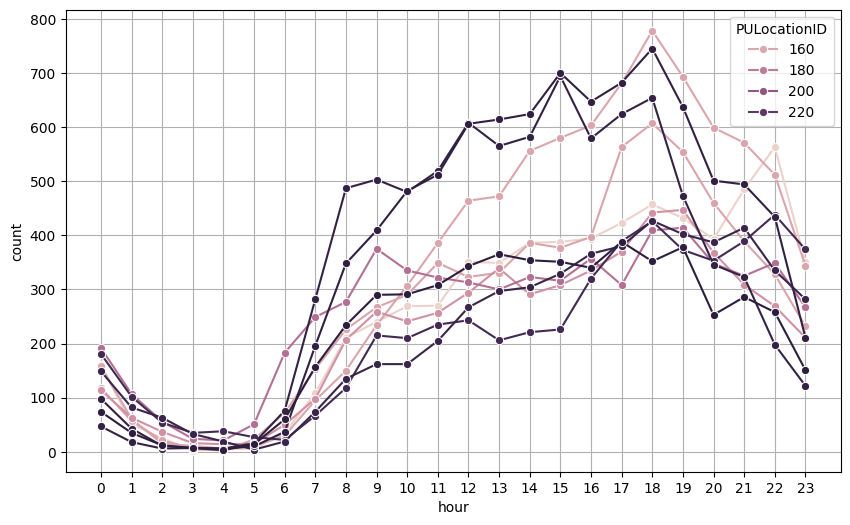

In [742]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pickup_trend, x = 'hour', y = 'count', hue='PULocationID', marker = 'o')
plt.xticks(range(0, 24))
plt.grid(True)

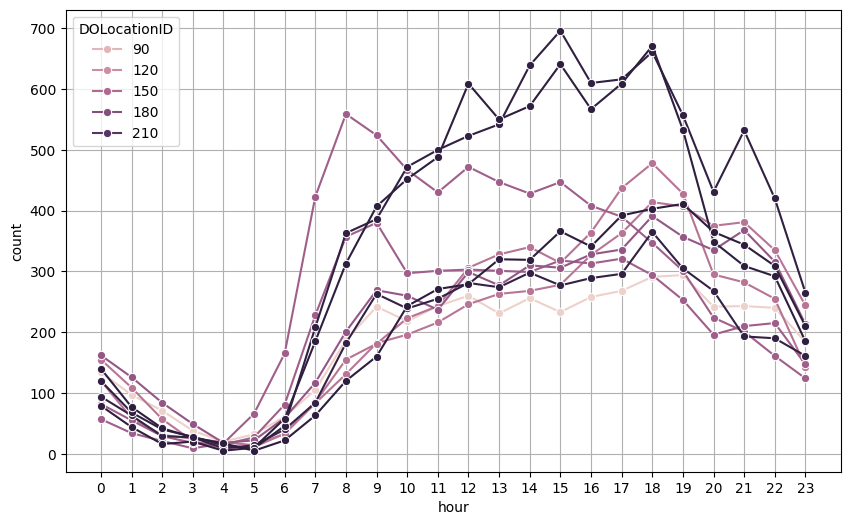

In [743]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=drop_trend, x = 'hour', y = 'count', hue='DOLocationID', marker = 'o')
plt.xticks(range(0, 24))
plt.grid(True)

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [744]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickups = merged_df['PULocationID'].value_counts().reset_index(name='PU_count')
dropoffs = merged_df['DOLocationID'].value_counts().reset_index(name='DO_count')

In [745]:
zone_ratio = pd.concat([pickups, dropoffs], axis = 1).fillna(0)
zone_ratio['PU_DO_ratio'] = zone_ratio['PU_count']/zone_ratio['DO_count'].replace(0, np.nan)

highest_ratio = zone_ratio.sort_values(by = 'PU_DO_ratio', ascending=False).head(10)
lowest_ratio = zone_ratio.sort_values(by='PU_DO_ratio', ascending=True).head(10)

In [746]:
highest_ratio

PULocationID  PU_count  DOLocationID  DO_count  PU_DO_ratio
2          236.0    8215.0           161      6722     1.222107
4          142.0    6355.0           239      5246     1.211399
5          186.0    6221.0           142      5158     1.206088
10         163.0    5151.0           163      4271     1.206041
3          162.0    6531.0           170      5440     1.200551
9          230.0    5262.0            68      4448     1.183004
8          234.0    5297.0           234      4496     1.178158
13         141.0    4465.0            48      3962     1.126956
11          68.0    4781.0           230      4256     1.123355
14          79.0    4410.0           263      3941     1.119005

In [747]:
lowest_ratio

PULocationID  PU_count  DOLocationID  DO_count  PU_DO_ratio
207           0.0       0.0           207         1          0.0
170           0.0       0.0           169         3          0.0
169           0.0       0.0             9         3          0.0
168           0.0       0.0           136         3          0.0
167           0.0       0.0           177         3          0.0
166           0.0       0.0           241         3          0.0
165           0.0       0.0            85         3          0.0
164           0.0       0.0           120         3          0.0
163           0.0       0.0            35         3          0.0
162           0.0       0.0           222         3          0.0

In [748]:
zone_ratio

PULocationID  PU_count  DOLocationID  DO_count  PU_DO_ratio
0           237.0    9054.0           236      8746     1.035216
1           161.0    8316.0           237      7964     1.044199
2           236.0    8215.0           161      6722     1.222107
3           162.0    6531.0           170      5440     1.200551
4           142.0    6355.0           239      5246     1.211399
..            ...       ...           ...       ...          ...
203           0.0       0.0           182         1     0.000000
204           0.0       0.0           210         1     0.000000
205           0.0       0.0           250         1     0.000000
206           0.0       0.0           235         1     0.000000
207           0.0       0.0           207         1     0.000000

[208 rows x 5 columns]

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [749]:
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
1         2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
2         2  2023-06-08 19:18:44   2023-06-08 19:27:16              2.0   
3         2  2023-12-22 00:34:11   2023-12-22 00:48:28              1.0   
4         2  2023-10-04 16:50:57   2023-10-04 16:57:42              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.39         1.0           231           230             1   
1           0.95         1.0           246           186             1   
2           1.97         1.0           143           238             1   
3           2.53         1.0           140           143             1   
4           0.62         1.0           249            68             1   

   fare_amount  ...  Shape_Area                       zone  LocationID  \
0         21.9  ...    0.000167       TriBeCa/Civic Center       231.0   
1          9.3  ...    0.000281  West Chelsea/Hudson Yards       246.0   
2         12.1  ...    0.000151        Lincoln Square West       143.0   
3         15.6  ...    0.000114            Lenox Hill East       140.0   
4          7.9  ...    0.000072               West Village       249.0   

     borough                                           geometry      speed  \
0  Manhattan  POLYGON ((981667.364 203305, 981854.109 203130...   8.901532   
1  Manhattan  POLYGON ((983031.177 217138.506, 983640.32 216...   6.785714   
2  Manhattan  POLYGON ((989338.1 223572.253, 989368.225 2235...  13.851562   
3  Manhattan  POLYGON ((995735.062 215619.835, 995670.105 21...  10.627771   
4  Manhattan  POLYGON ((983555.319 204876.901, 983469.158 20...   5.511111   

      route  hour  week_day weekend_or_weekday  
0  231--230    23         3            Weekday  
1  246--186    19         1            Weekday  
2  143--238    19         3            Weekday  
3  140--143     0         4            Weekday  
4   249--68    16         2            Weekday  

[5 rows x 35 columns]

In [750]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'combined_airport_fee', 'pickup_hour', 'day',
       'month', 'quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry', 'speed',
       'route', 'hour', 'week_day', 'weekend_or_weekday'],
      dtype='object')

In [751]:
merged_df['zone']

0                 TriBeCa/Civic Center
1            West Chelsea/Hudson Yards
2                  Lincoln Square West
3                      Lenox Hill East
4                         West Village
                      ...             
166230                    East Village
166231    Penn Station/Madison Sq West
166232                    Midtown East
166233                        Gramercy
166234             Lincoln Square East
Name: zone, Length: 166235, dtype: object

In [767]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_merge_df = merged_df[(merged_df['hour'].ge(23)) | (merged_df['hour'].le(5))]

In [768]:
zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
..             ...                                                ...  
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...  
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...  
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...  
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....  
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...  

[263 rows x 7 columns]

In [769]:
night_merge_df = night_merge_df.merge(zones[['LocationID', 'zone']].rename(columns= {'zone': 'PU_Zone', 'LocationID': 'PU_zone_LocationID'}), left_on='PULocationID', right_on='PU_zone_LocationID', how='left')
night_merge_df = night_merge_df.merge(zones[['LocationID', 'zone']].rename(columns={'zone': 'DO_Zone', 'LocationID': 'DO_zone_LocationID'}), left_on='DOLocationID', right_on='DO_zone_LocationID', how='left')
top_10_night_PU = night_merge_df.groupby('PU_Zone')['PULocationID'].count().sort_values(ascending=False).head(10)


In [770]:
top_10_night_DO = night_merge_df.groupby('DO_Zone')['PULocationID'].count().sort_values(ascending=False).head(10)

In [771]:
top_10_night_PU

PU_Zone
East Village                    1675
West Village                    1405
Lower East Side                 1112
Clinton East                    1058
Greenwich Village South         1056
Times Sq/Theatre District        811
Penn Station/Madison Sq West     718
Midtown South                    665
East Chelsea                     647
Union Sq                         633
Name: PULocationID, dtype: int64

In [772]:
top_10_night_DO

DO_Zone
East Village             912
Clinton East             695
Murray Hill              674
Gramercy                 658
Lenox Hill West          606
East Chelsea             576
Yorkville West           563
West Village             558
Upper East Side North    544
Upper West Side South    518
Name: PULocationID, dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [773]:
# Filter for night hours (11 PM to 5 AM)

night_revenue = night_merge_df['total_amount'].sum()
day_merge_df = merged_df[(merged_df['hour']>5) & (merged_df['hour']< 23)]

In [ ]:
night_merge_df['hour'].value_counts()

hour
23    7440
0     5148
1     3485
2     2349
3     1378
4      781
5      577
Name: count, dtype: int64

In [775]:
merged_df.groupby('hour')['total_amount'].agg(sum)

hour
0     125607.67
1      81879.67
2      54851.20
3      31391.22
4      19119.58
5      12801.29
6      30647.87
7      73799.27
8     120733.35
9     152330.33
10    159914.08
11    170873.30
12    195042.35
13    196829.86
14    207187.18
15    220477.64
16    232620.92
17    262641.11
18    298449.70
19    279373.92
20    230385.43
21    231985.59
22    225388.01
23    182338.33
Name: total_amount, dtype: float64

In [777]:
day_revenue = day_merge_df['total_amount'].sum()
Total_revenue = merged_df['total_amount'].sum()
night_share = (night_revenue/Total_revenue)*100
day_share = (day_revenue/Total_revenue) * 100
print("Night Share: {}".format(night_share))
print("Day Share: {}".format(day_share))

Night Share: 13.383237711747034
Day Share: 86.62014051280696


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [778]:
# Analyse the fare per mile per passenger for different passenger counts

merged_df['fare_per_mile_per_passenger'] = merged_df['fare_amount'] / (merged_df['trip_distance'] * merged_df['passenger_count'])


In [779]:
passenger_summery = merged_df.groupby('passenger_count')['fare_per_mile_per_passenger'].agg('mean', 'count')

In [780]:
passenger_summery

passenger_count
1.0    8.237573
2.0    4.080858
3.0    3.165455
4.0    2.207912
5.0    1.592293
6.0    1.341562
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [781]:
# Compare the average fare per mile for different days and for different times of the day

merged_df['fare_per_mile'] = merged_df['fare_amount']/merged_df['trip_distance']

In [782]:
average_fare_per_mile = merged_df.groupby('day')['fare_per_mile'].mean().reset_index()

In [783]:
average_fare_per_mile

day  fare_per_mile
0     Friday       8.232013
1     Monday       7.864050
2   Saturday       8.385842
3     Sunday       7.425211
4   Thursday       8.705003
5    Tuesday       8.494726
6  Wednesday       8.551505

In [784]:
average_fare_per_day = merged_df.groupby('hour')['fare_per_mile'].mean().reset_index()

In [785]:
average_fare_per_day

hour  fare_per_mile
0      0       6.781529
1      1       7.932053
2      2       6.613023
3      3       6.444372
4      4       6.095699
5      5       6.254852
6      6       7.911145
7      7       7.160259
8      8       7.947772
9      9       8.262598
10    10       8.442776
11    11       8.789297
12    12       8.944457
13    13       9.007855
14    14       9.191300
15    15       9.003804
16    16       9.146300
17    17       8.760061
18    18       8.537184
19    19       8.246853
20    20       8.145844
21    21       7.828581
22    22       7.111383
23    23       7.154896

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [795]:
# Compare fare per mile for different vendors

merged_vendor_df = merged_df.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

In [796]:
merged_vendor_df

VendorID  hour  fare_per_mile
0          1     0       6.743950
1          1     1       6.696620
2          1     2       6.641333
3          1     3       6.343295
4          1     4       6.140889
5          1     5       6.235673
6          1     6       6.758685
7          1     7       7.180243
8          1     8       8.007823
9          1     9       8.294617
10         1    10       8.485904
11         1    11       8.808217
12         1    12       8.997197
13         1    13       8.932147
14         1    14       8.923000
15         1    15       9.056142
16         1    16       8.885748
17         1    17       8.664891
18         1    18       8.497492
19         1    19       8.025512
20         1    20       7.558976
21         1    21       7.298128
22         1    22       7.027989
23         1    23       6.907895
24         2     0       6.792447
25         2     1       8.300152
26         2     2       6.604446
27         2     3       6.475318
28         2     4       6.082841
29         2     5       6.261650
30         2     6       8.388060
31         2     7       7.152361
32         2     8       7.924117
33         2     9       8.250218
34         2    10       8.425711
35         2    11       8.782149
36         2    12       8.924608
37         2    13       9.036185
38         2    14       9.296446
39         2    15       8.984027
40         2    16       9.242705
41         2    17       8.795607
42         2    18       8.551004
43         2    19       8.320222
44         2    20       8.339347
45         2    21       7.994053
46         2    22       7.137323
47         2    23       7.228690

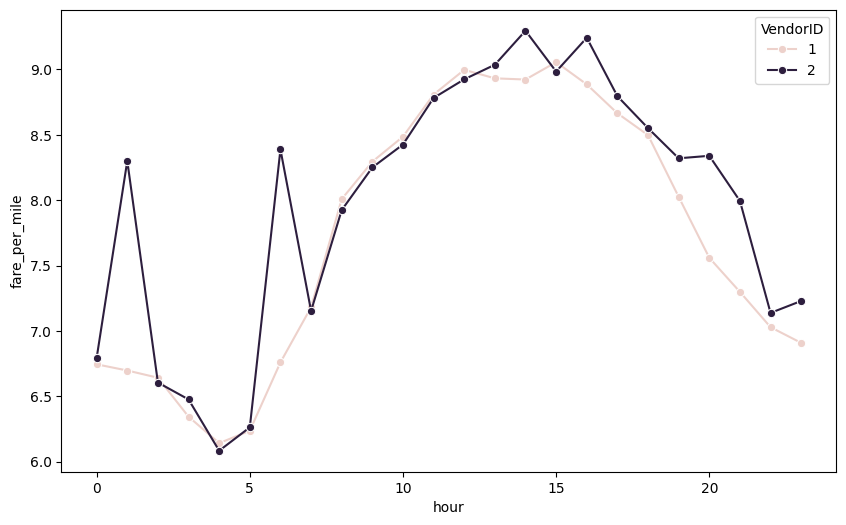

In [797]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = merged_vendor_df, x="hour", y="fare_per_mile", hue="VendorID", marker='o')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [798]:
merged_df['trip_distance'].value_counts()

trip_distance
1.00     2649
0.90     2572
1.10     2527
0.80     2456
1.20     2432
         ... 
10.92       1
10.85       1
11.21       1
10.64       1
10.59       1
Name: count, Length: 1079, dtype: int64

In [799]:
# Defining distance tiers
def dist_tier(distance):
    if distance < 2:
        return 'Less than 2 Miles'
    elif distance <=5:
        return '2 to 5 Miles'
    else:
        return 'Greater than 5 Miles'
    
merged_df['tiers'] = merged_df['trip_distance'].apply(dist_tier)

distance_tier_fare = merged_df.groupby(['VendorID', 'tiers'])['fare_per_mile'].mean().reset_index()

In [800]:
distance_tier_fare

VendorID                 tiers  fare_per_mile
0         1          2 to 5 Miles       6.414313
1         1  Greater than 5 Miles       4.718799
2         1     Less than 2 Miles       9.442029
3         2          2 to 5 Miles       6.523890
4         2  Greater than 5 Miles       4.796967
5         2     Less than 2 Miles       9.663966

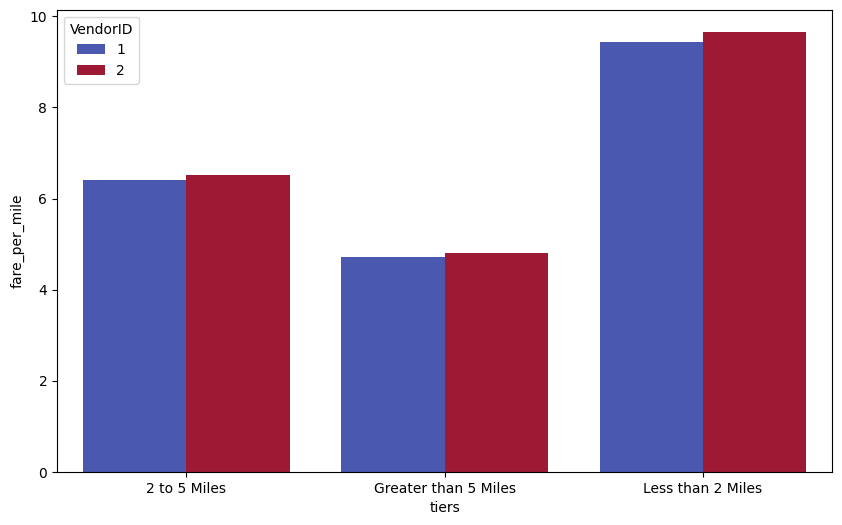

In [806]:
plt.figure(figsize=(10, 6))
sns.barplot(data = distance_tier_fare, x='tiers', y='fare_per_mile', hue='VendorID', palette='coolwarm')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [807]:
merged_df['trip_distance'].value_counts()

trip_distance
1.00     2649
0.90     2572
1.10     2527
0.80     2456
1.20     2432
         ... 
10.92       1
10.85       1
11.21       1
10.64       1
10.59       1
Name: count, Length: 1079, dtype: int64

In [816]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
merged_df['trip_distance'].value_counts()


trip_distance
1.00     2649
0.90     2572
1.10     2527
0.80     2456
1.20     2432
         ... 
10.92       1
10.85       1
11.21       1
10.64       1
10.59       1
Name: count, Length: 1079, dtype: int64

In [809]:
merged_df['tip_percentage'] = (merged_df['tip_amount']/merged_df['total_amount']) * 100

tip_distance_df = merged_df.groupby('tiers')['tip_percentage'].mean().reset_index()

In [810]:
tip_passenger_df = merged_df.groupby('passenger_count')['tip_percentage'].mean().reset_index()

In [811]:
tip_hour_df = merged_df.groupby('hour')['tip_percentage'].mean().reset_index()

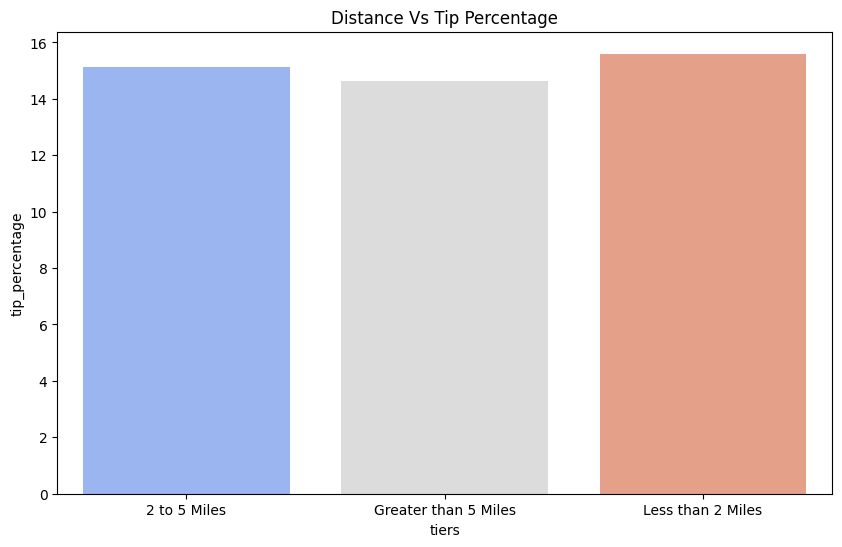

In [818]:
plt.figure(figsize=(10, 6))
sns.barplot(data = tip_distance_df, x='tiers', y='tip_percentage', palette='coolwarm')
plt.title("Distance Vs Tip Percentage")
plt.show()

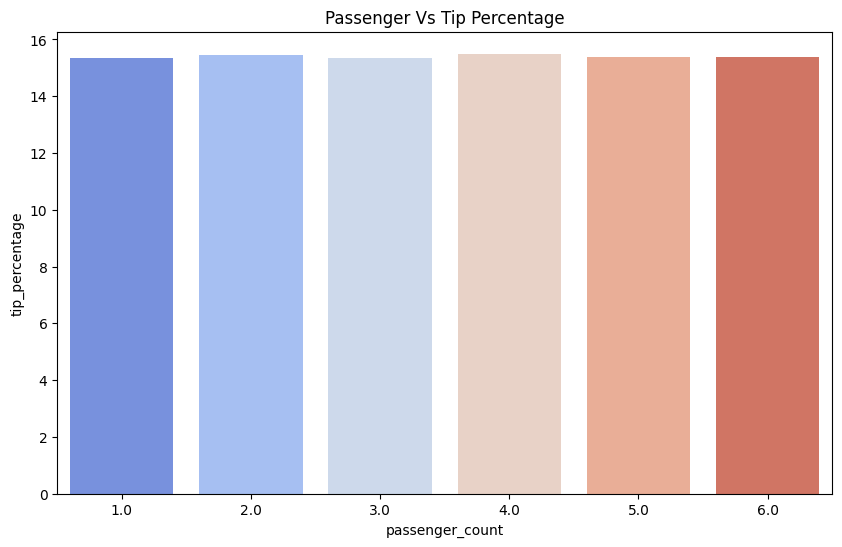

In [817]:
plt.figure(figsize=(10, 6))
sns.barplot(data = tip_passenger_df, x='passenger_count', y='tip_percentage', palette='coolwarm')
plt.title("Passenger Vs Tip Percentage")
plt.show()

In [865]:
tip_passenger_df

passenger_count  tip_percentage
0              1.0       15.363977
1              2.0       15.445165
2              3.0       15.346943
3              4.0       15.497742
4              5.0       15.376851
5              6.0       15.366298

In [823]:
plt.figure(figsize=(10, 6))
sns.barplot(data = tip_hour_df, x='hour', y='tip_percentage', palette='coolwarm')
plt.title("Hours Vs Tip Percentage")
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [824]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'combined_airport_fee', 'pickup_hour', 'day',
       'month', 'quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry', 'speed',
       'route', 'hour', 'week_day', 'weekend_or_weekday',
       'fare_per_mile_per_passenger', 'fare_per_mile', 'tiers',
       'tip_percentage'],
      dtype='object')

In [825]:
# See how passenger count varies across hours and days
day_hour_passenger_pivot = (merged_df.groupby(['day', 'hour'])['passenger_count']
                         .mean()
                         .reset_index()
                         .pivot(index='day', columns="hour", values="passenger_count")
                         .reindex(order))

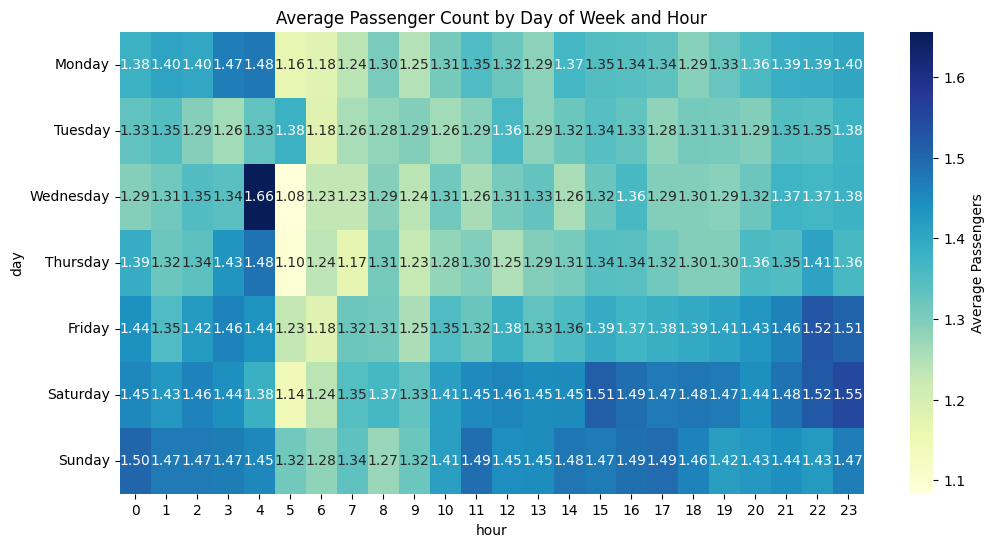

In [826]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    day_hour_passenger_pivot,
    annot=True, fmt=".2f",
    cmap="YlGnBu",
    cbar_kws={"label": "Average Passengers"}
)
plt.title("Average Passenger Count by Day of Week and Hour")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [830]:
# How does passenger count vary across zones

agg = (merged_df.groupby("PULocationID")['passenger_count']
       .agg(avg_passenger = "mean",
            total_passengers = "sum",
            trip_count = "count").reset_index().rename(columns={"PULocationID": "LocationID"}))

In [832]:
zones_agg = zones.merge(agg, on="LocationID", how = "left")
zones_agg[["avg_passenger", "total_passenger", "trip_count"]] = zones_agg[["avg_passenger", "total_passengers", "trip_count"]].fillna(0)

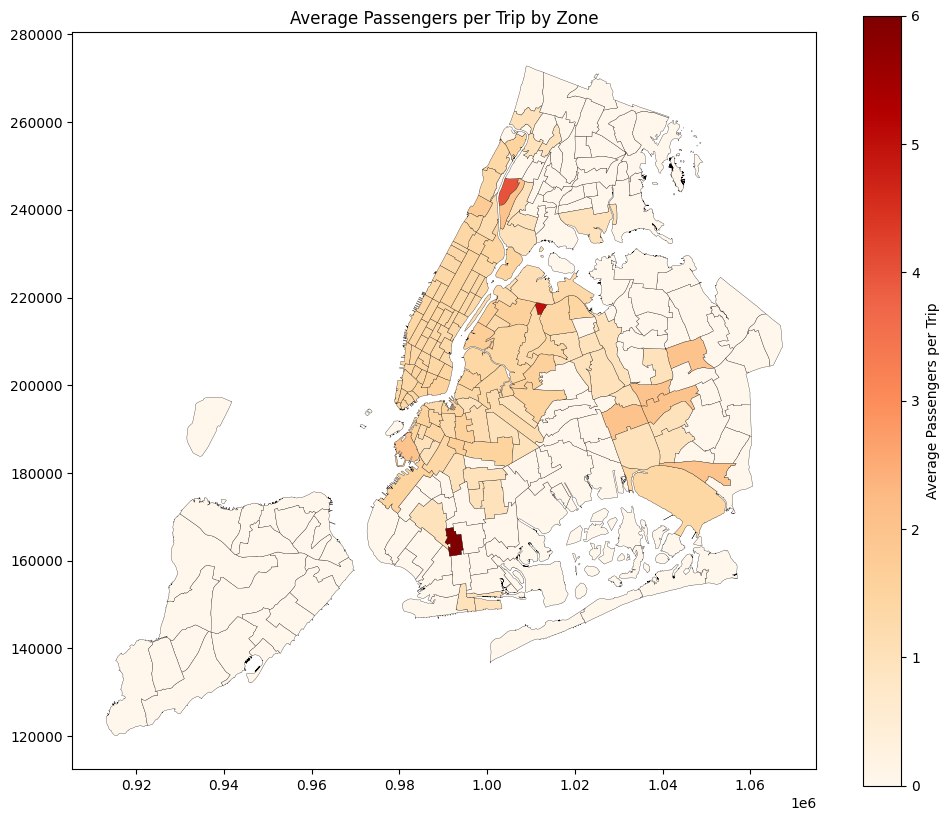

In [833]:
fig, ax = plt.subplots(1, figsize = (12, 10))
zones_agg.plot(
    column = "avg_passenger",
    cmap="OrRd",
    legend = True,
    legend_kwds={"label": "Average Passengers per Trip"},
    edgecolor = "black",
    linewidth = 0.2,
    ax = ax
)
ax.set_title("Average Passengers per Trip by Zone")
plt.show()

In [835]:
zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
..             ...                                                ...  
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...  
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...  
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...  
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....  
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...  

[263 rows x 7 columns]

In [854]:
top10 = (
    agg.sort_values("total_passengers", ascending=False)
    .head(10)
    .merge(zones[["LocationID", "zone"]], on="LocationID")
)
plt.figure(figsize=(10,6))
plt.barh(top10["zone"], top10["total_passengers"], color = "skyblue")
plt.gca().invert_yaxis()
plt.title("Total Passengers Vs Zones")
plt.show()

In [842]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_agg['avg_passenger_count'] = (zones_agg["total_passenger"]/zones_agg['trip_count']).fillna(0)
print("Zone-level avg passenger count stats:")
print(zones_agg["avg_passenger_count"].describe())


Zone-level avg passenger count stats:
count    263.000000
mean       0.745403
std        0.828940
min        0.000000
25%        0.000000
50%        1.000000
75%        1.361892
max        6.000000
Name: avg_passenger_count, dtype: float64


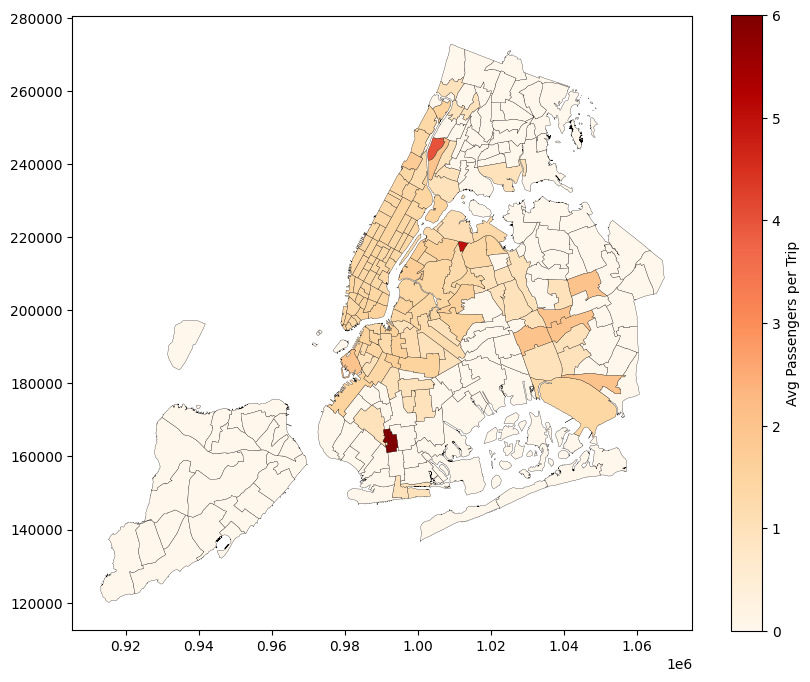

In [845]:
fig, ax = plt.subplots(1, figsize = (10, 8))
zones_agg.plot(column="avg_passenger_count",
               cmap="OrRd",
               legend=True,
               legend_kwds={"label": "Avg Passengers per Trip"},
               edgecolor="black",
               linewidth=0.2,
               ax = ax)

plt.figure(figsize=(8,4))
zones_agg["avg_passenger_count"].hist(bins=30)
plt.xlabel("Avg Passengers per Trip")
plt.ylabel("Number of Zones")
plt.title("Distribution of Avg Passengers per Zone")
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [846]:
# How often is each surcharge applied?

surcharge_columns = ['extra', 'mta_tax', 'tolls_amount', 'congestion_surcharge', 'tip_amount', 'improvement_surcharge']

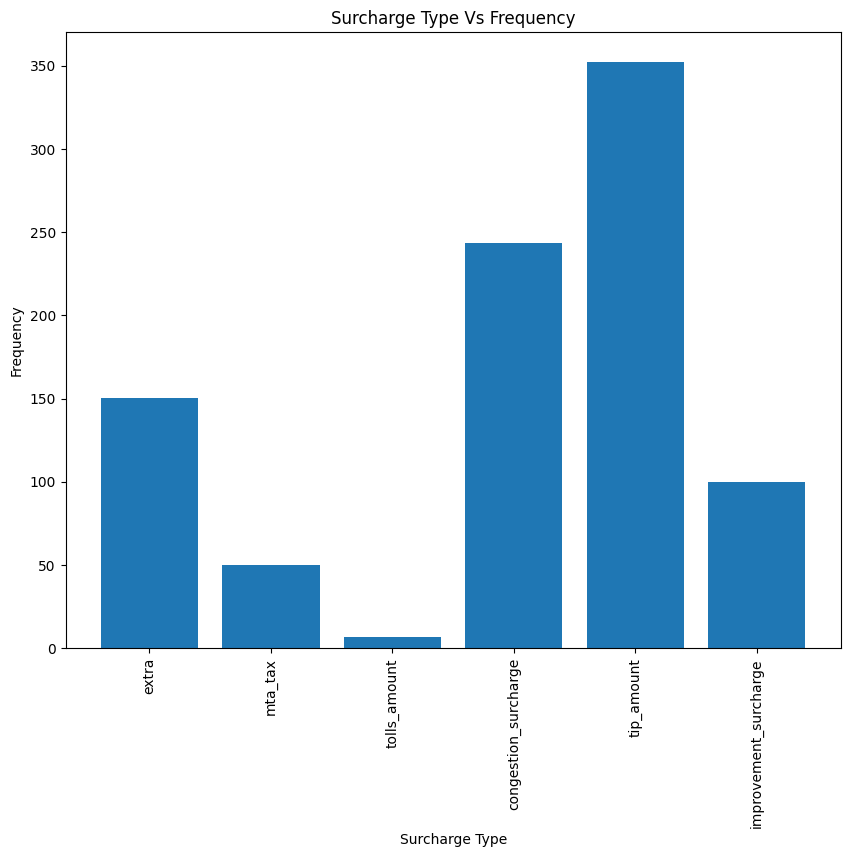

In [852]:
surcharge_frequency = (merged_df[surcharge_columns].sum()/len(merged_df))*100
plt.figure(figsize=(10, 8))
plt.bar(surcharge_frequency.index, surcharge_frequency.values)
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Surcharge Type")
plt.title("Surcharge Type Vs Frequency")
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Implement dynamic routing using historical traffic + demand prediction.
2. Use real-time GPS and triffic data to dynamically reroute cabs for faster pickups/drop-offs
3. Deploy micro-scheduing for shift rotations of drives to increase availability during demand spikes (morning/evening)
4. Enable automated alerts for dispatchers to shift idle cabs from low demand to high demand zones in real time

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Use historical pickup heatmaps to position idle cabs in zones that experience morning and evening high demands
2. Use clustering of high demand pickup locations for pre-positioning pools of cabs
3. On weekend or holidays, reposition more cabs to leisure zones
4. For airports and major transit hubs, maintain a minimum cab threshold based on historical hourly trends.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Introduce time-of-day dynamic pricing (surge pricing) where demand is greater than supply (e.g., late-night, early-morning).
1. To increase revenue dynamic prizing can be incorporated based on high demand and distance.
1. Consider zone-based minimum fares for high demand downtown areas to maximize yield on short trips.
1. Promote flat-fare packages for routes like airport to downtown or zone to zone to simplify and attract volume.
1. Offer incentives for pooled rides or multi passenger trips to optimze usage.